# Çevrimiçi Ödemelerde Sahtekarlığın Anlaşılması

## Problemin Tanımı
Günümüzde son kullanıcılar için çevrimiçi alışveriş git gide artan öneme sahip olmakla beraber bu satışı yapan firmalar için ödemelerde sahtekarlığın anlaşılması ve ödemenin o anda reddedilmesi firma için büyük önem arz etmektedir. Çünkü anlaşılmayan sahtekarlık firmanın iade ve iptal süreçleriyle uğraşması ve postalanan ürünün geri alınamaması ya da son kullanıcının zarar etmesi sonuçlarını doğurmaktadır. Bunların engellenmesi çevrimiçi ödeme platformları için büyük bir sorundur.

2020 yılında e-ticaret siteleri çevrimiçi ödemelerdeki sahtekarlıklar yüzünden 20 milyar dolardan fazla zarar etti. Bu sayı 2022 yılında 41 milyar dolar oldu ve 2023 yılında ise 48 milyar doları aşması beklenmektedir.
E-ticaret sitelerin bu sahtekarlıklarla klasik yordamlarla ya da insan gücüyle başa çıkması imkansız bir görevidr. 

## Problemin Çözümü

Günümüz dünyasında milyonlarca insanın artık çevrimiçi alışveriş yaptığı düşünülürse ve bu sayının hiç bir zaman azalmayıp her zaman artacağı da eklenirse bu problemin çözümü ancak yapay zeka tarafından yapılabileceği analşılır. Problemin çözümü için kaggle üzerinden bulunan veri setinde KNN, Naive Bayes, Lojistik Regresyon, Karar Ağaçları, Rastgele Orman, Gradient Arttırma ve Karar Destek Sistemleri algoritmalarıyla modeller denenmiş ve sonuçları karşılaştırmalı olarak gösterilmiştir.

# Literatür Taraması

Ulusal Tez Merkezi'nde "fraud" kelimesiyle yapılan aramada 106 adet Bilgisayar Mühendisliği ait tez bulunmaktadır. 


1- ) Four Classification Methods Naïve Bayesian, Support Vector Machine, K-Nearest Neighbors and Random Forest Are Tested For Credit Card Fraud Detection - LAYTH RAFEA HAZIM

Tezinde kredi kartında sahtekarlığın tespitini 4 adet sınıflandırma algoritmasıyla incelemiştir. Bulduğu sonuçlar ise NB 97.46%, SVM 95.04%, KNN 97.55% and RF 97.7%'dir. Veri seti burada kullanılan verisetiyle aynıdır.

2-) Kredi Kartı Sahte İşlem Tespiti - Kazım SOYLU

Tezinde aynı veri setini kullanmış olup Derin öğrenme, Rastgele orman ve Yığınlar üzerinde çalışmıştır. Bu algoritmaların sonuçlarını grafiksel olarak paylaşmıştır. Kesinlik değerinde Rastgele orman daha iyi performans vermiş olup, sahte işlem tespitinde oranında ise Yığın daha başarılı olmuştur.

Not: Sınıflandırıcı yığınında temel öğrenici olarak derin öğrenme ve rastgele orman modelleri kullanılmış, meta öğrenici olarak da yine rastgele orman algoritması kullanılmıştır.

In [ ]:
import numpy as np
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

pd.set_option("display.precision", 2)
frac = 0.00005

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/Project/Datasets/creditcard.csv');

## Özniteliklerin incelenmesi

In [ ]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Time**: Bu işlem ile ilk işlem arasında geçen saniye sayısıdır.

**V1 - V2**: Kullanıcı kimlikleri ve hassas özellikleri (V1 - V28) korumak için PCA uygulanmıştır.

**Amount**: İşlemin miktarıdır.

Class: 1 ise sahtekarlıktır.

**PCA**: (Principal component analysis) Temel bileşen analizi, çok boyutlu uzaydaki bir verinin daha düşük boyutlu bir uzaya izdüşümünü, varyansı maksimize edecek şekilde bulma yöntemidir. Uzayda bir noktalar kümesi için, tüm noktalara ortalama uzaklığı en az olan "en uygun doğru" seçilir.

In [ ]:
print("Satır Sayısı: {}".format(dataset.shape[0]))
print("Öznitelik Syısı: {}".format(dataset.shape[1]))
print("Fraud İşlem Sayısı: {}".format(dataset[dataset['Class'] == 1].shape[0]))

Satır Sayısı: 284807
Öznitelik Syısı: 31
Fraud İşlem Sayısı: 492


In [ ]:
dataset.loc[:,"Time":"V15"].sample(frac=frac)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
59991,49101.0,-0.97,2.32,-0.96,2.74e-01,1.67,-1.65,1.63,-0.44,-0.04,-1.00e+00,0.11,-1.40,-1.01,-3.80e+00,0.55
253314,156193.0,2.09,-0.63,-0.97,-6.34e-01,-0.82,-0.83,-0.91,-0.09,-0.34,2.24e-01,1.61,0.46,1.01,-2.09e+00,-0.48
165496,117467.0,2.25,-0.75,-1.72,-1.25e+00,-0.02,-0.34,-0.51,-0.13,-0.71,1.06e+00,0.43,-0.35,-0.07,2.33e-01,-0.25
129562,79135.0,-2.18,1.06,0.28,2.97e-01,-0.39,-1.24,-0.01,0.57,-0.39,-4.75e-01,-0.43,0.28,0.39,-5.92e-03,0.92
106073,69810.0,-1.38,1.23,1.14,-5.84e-03,0.05,-0.47,0.50,0.12,0.05,-1.23e-01,-0.52,-0.40,-1.08,3.39e-01,0.82
1685,1308.0,-1.38,0.54,2.65,1.41e+00,0.13,0.99,0.96,-0.63,1.73,1.35e+00,-0.62,0.52,0.17,-2.02e+00,-1.19
86668,61345.0,-1.42,-1.01,1.63,-2.11e+00,-0.90,1.74,-1.00,1.09,-2.88,4.92e-01,1.89,0.06,0.69,2.38e-02,1.04
236042,148652.0,-0.38,0.97,-2.65,3.20e-01,3.72,3.33,1.19,0.62,-0.91,-1.06e+00,0.34,-0.60,-0.56,-1.76e+00,0.31
216778,140630.0,-0.68,1.59,-2.01,-3.71e-01,0.73,-1.69,0.76,0.34,-0.92,-1.10e+00,-0.37,0.28,0.28,-7.33e-02,-0.14
92627,64018.0,1.22,-0.40,1.10,4.77e-01,-1.22,-0.28,-0.73,0.09,1.34,-3.84e-01,-1.07,0.28,-0.56,-5.72e-01,-0.63


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.48e+04,47488.15,0.00,54201.50,8.47e+04,139320.50,172792.00
V1,284807.0,1.17e-15,1.96,-56.41,-0.92,1.81e-02,1.32,2.45
V2,284807.0,3.42e-16,1.65,-72.72,-0.60,6.55e-02,0.80,22.06
V3,284807.0,-1.38e-15,1.52,-48.33,-0.89,1.80e-01,1.03,9.38
V4,284807.0,2.07e-15,1.42,-5.68,-0.85,-1.98e-02,0.74,16.88
V5,284807.0,9.60e-16,1.38,-113.74,-0.69,-5.43e-02,0.61,34.80
V6,284807.0,1.49e-15,1.33,-26.16,-0.77,-2.74e-01,0.40,73.30
V7,284807.0,-5.56e-16,1.24,-43.56,-0.55,4.01e-02,0.57,120.59
V8,284807.0,1.21e-16,1.19,-73.22,-0.21,2.24e-02,0.33,20.01
V9,284807.0,-2.41e-15,1.10,-13.43,-0.64,-5.14e-02,0.60,15.59


## Veri Setinin Dağılımının Gösterilmesi


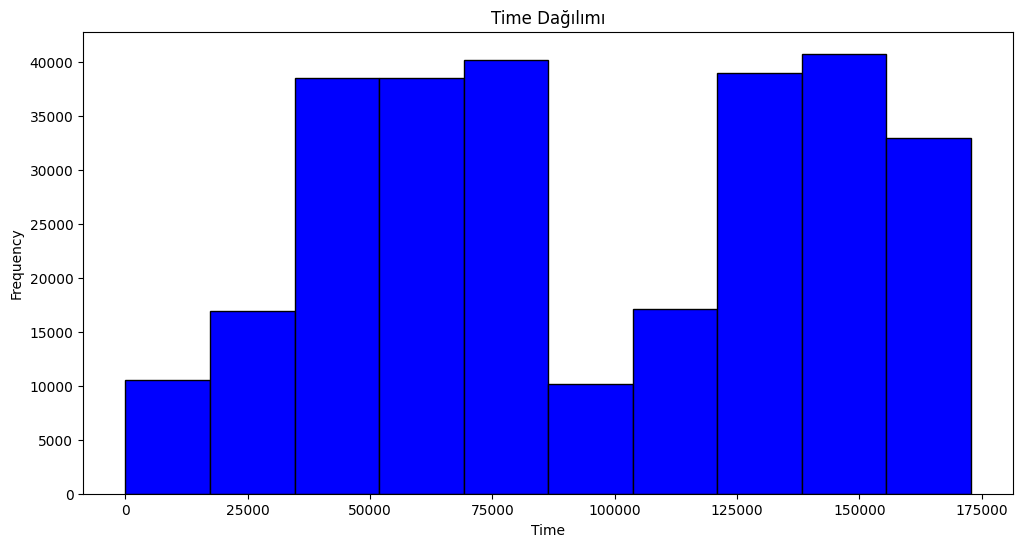

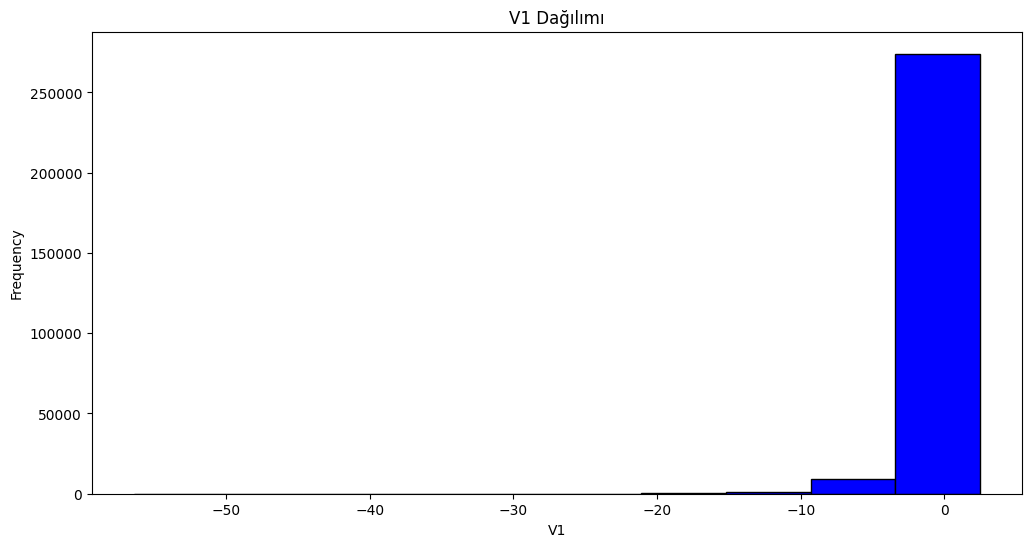

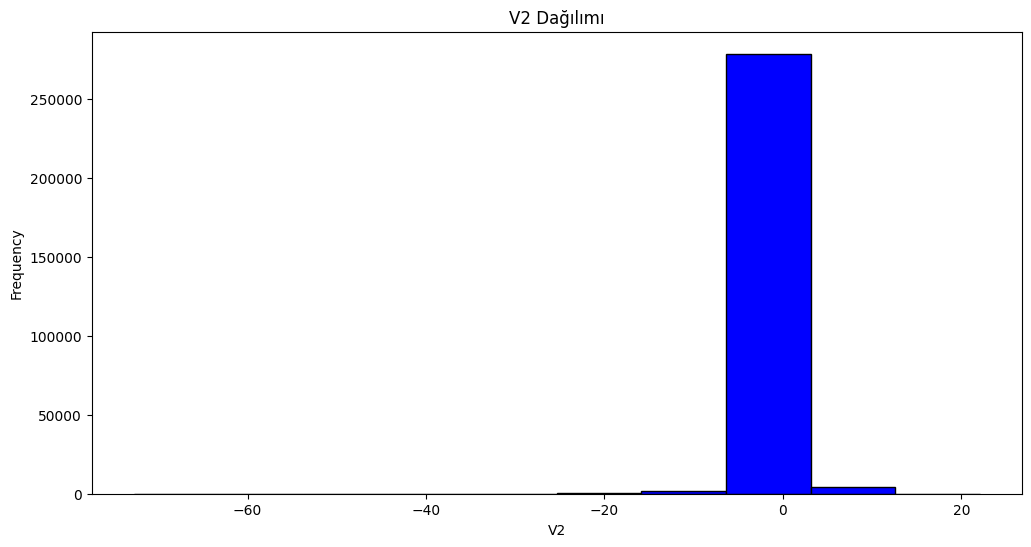

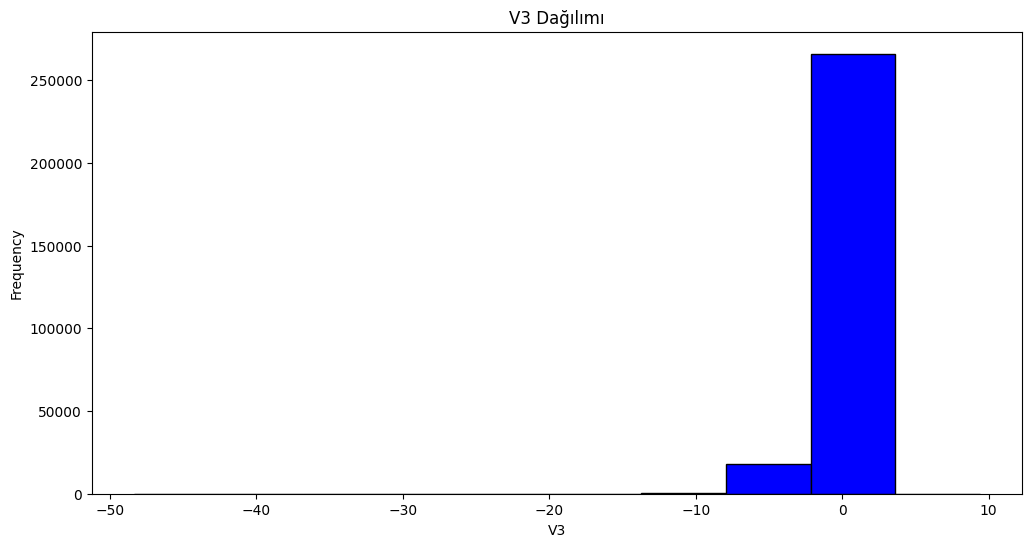

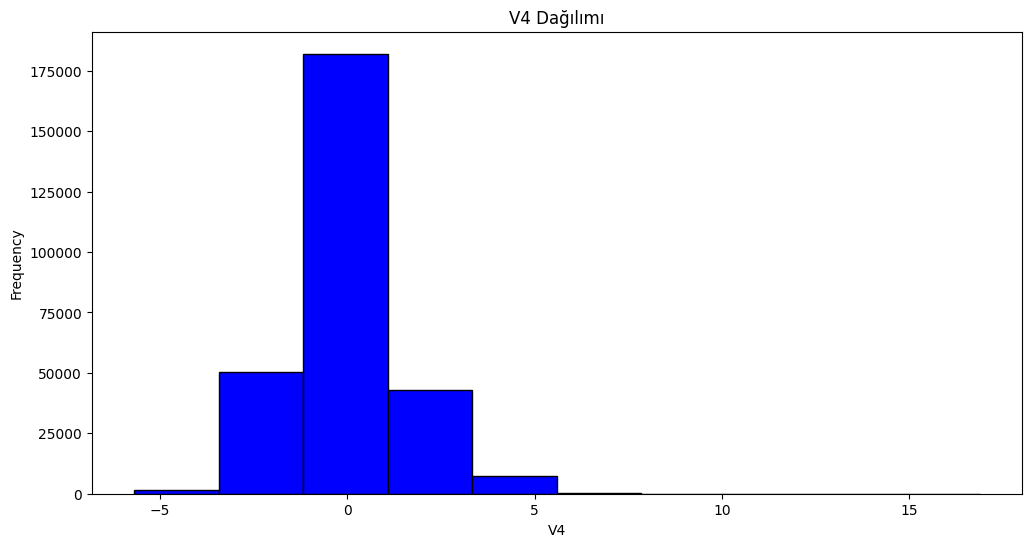

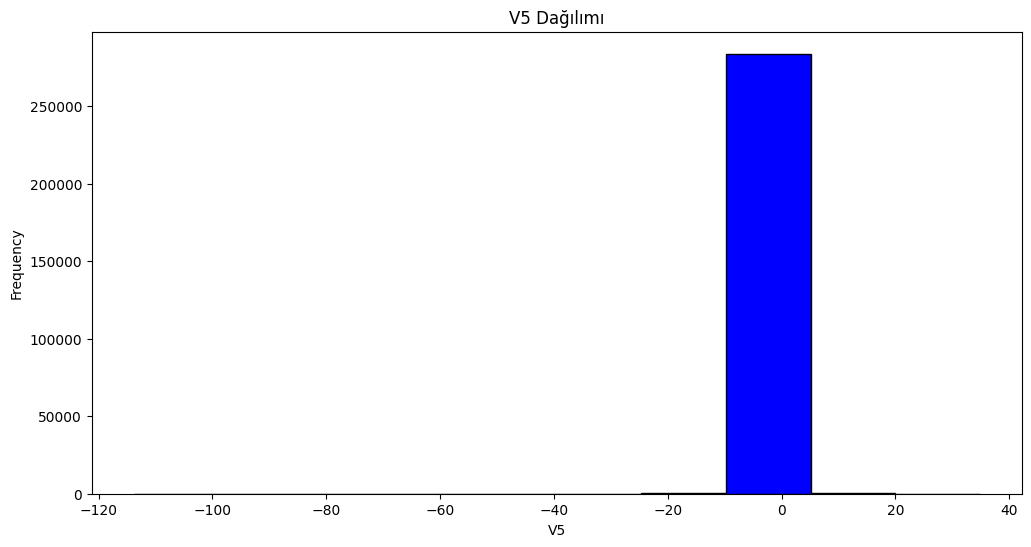

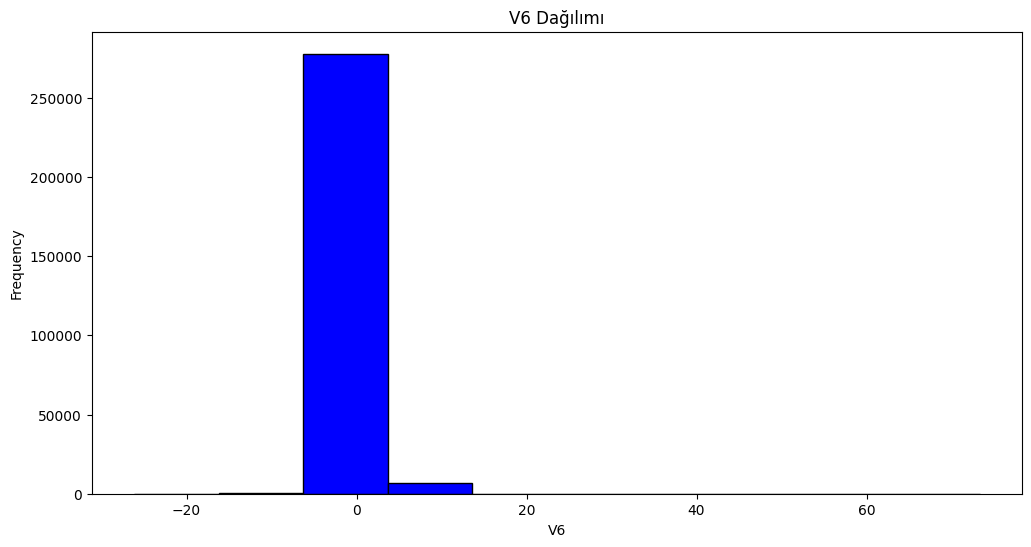

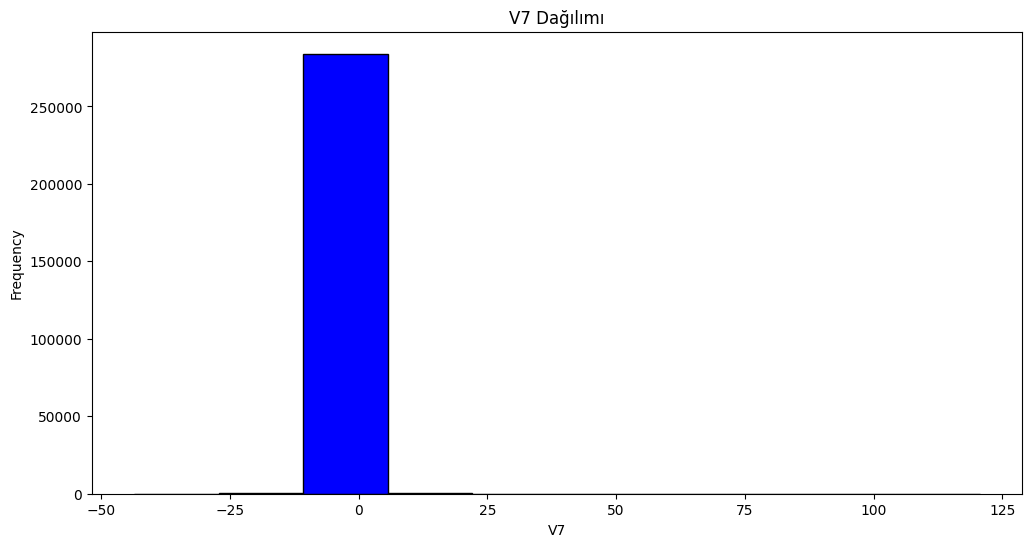

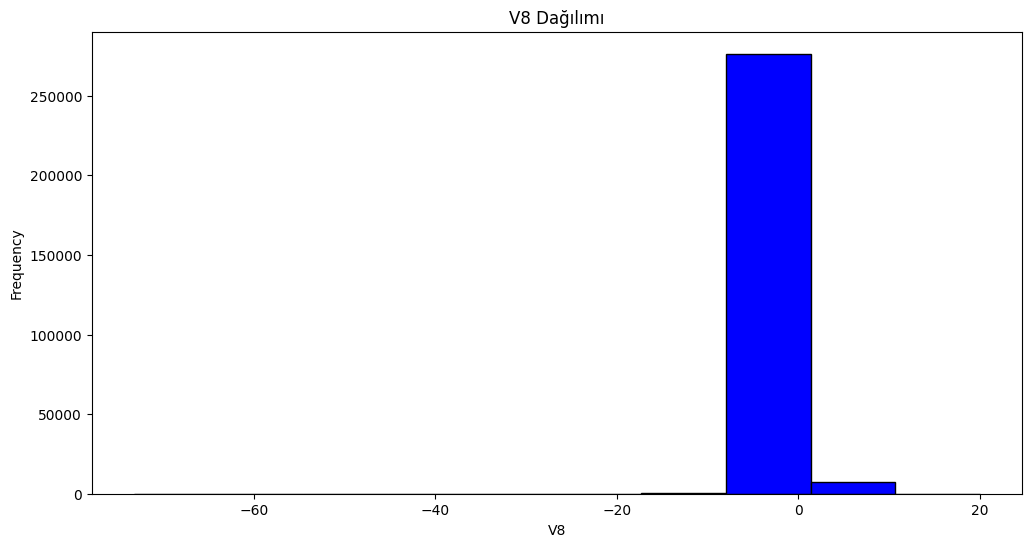

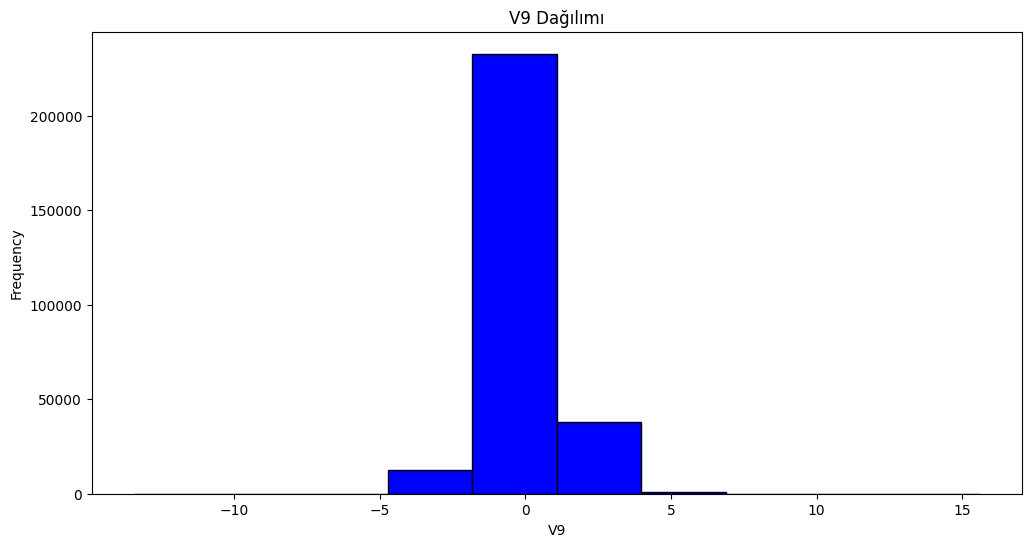

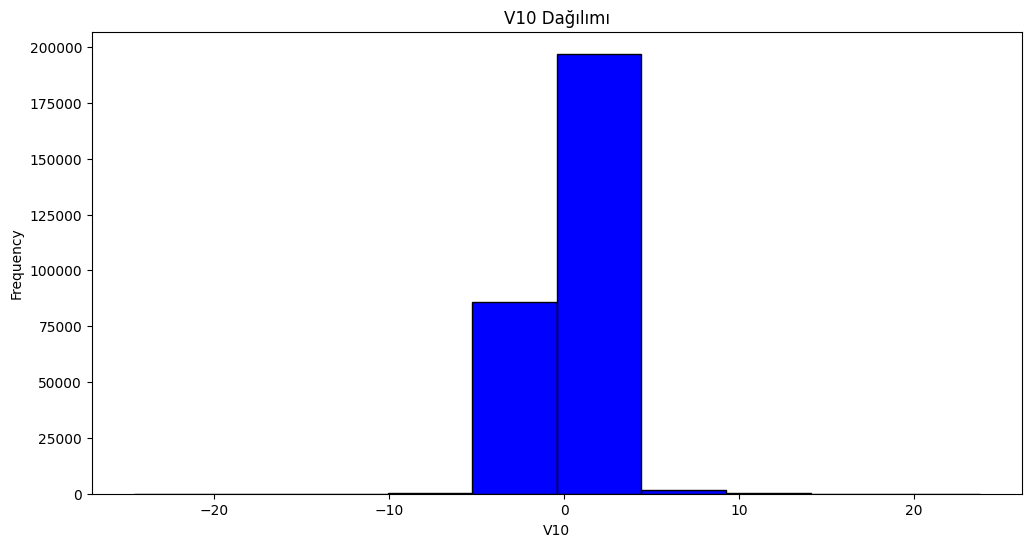

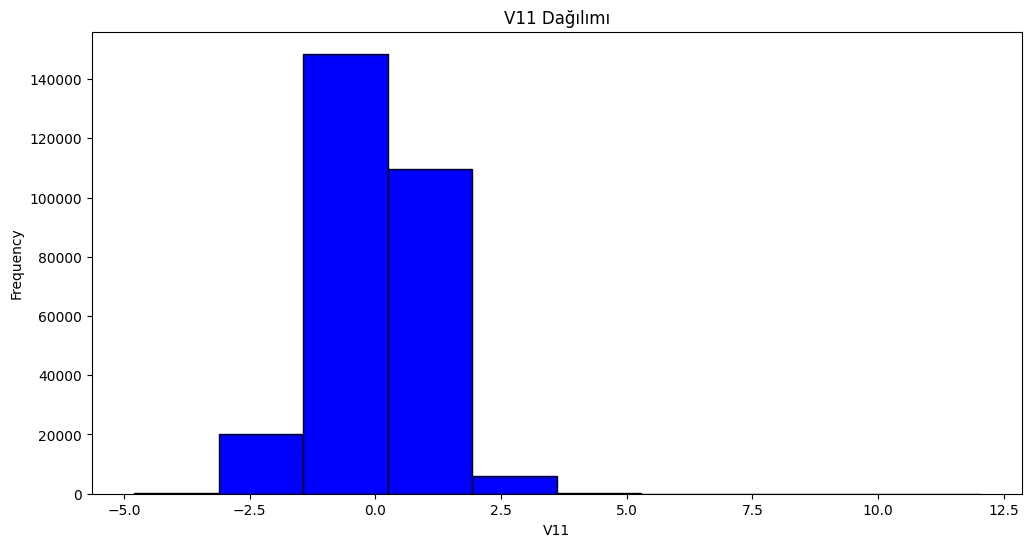

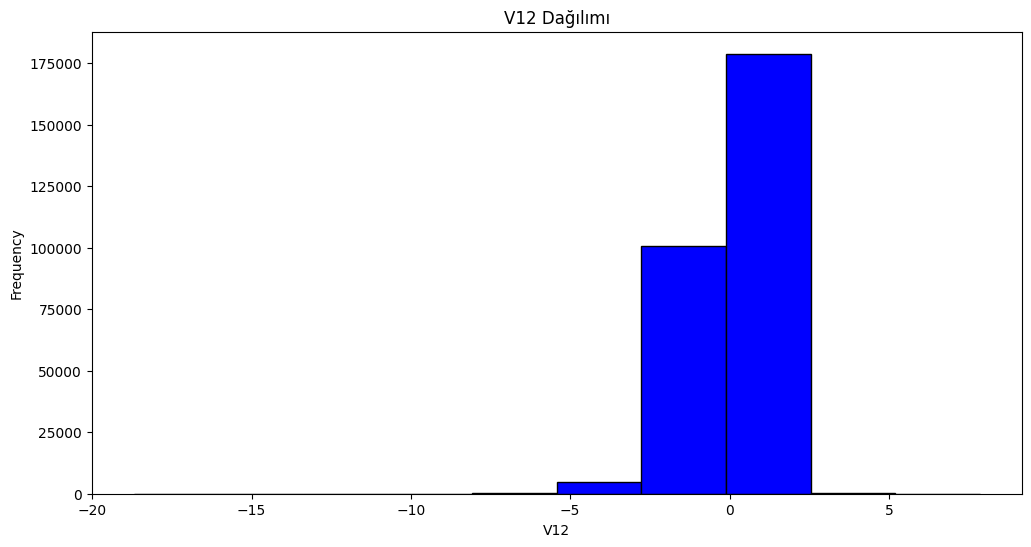

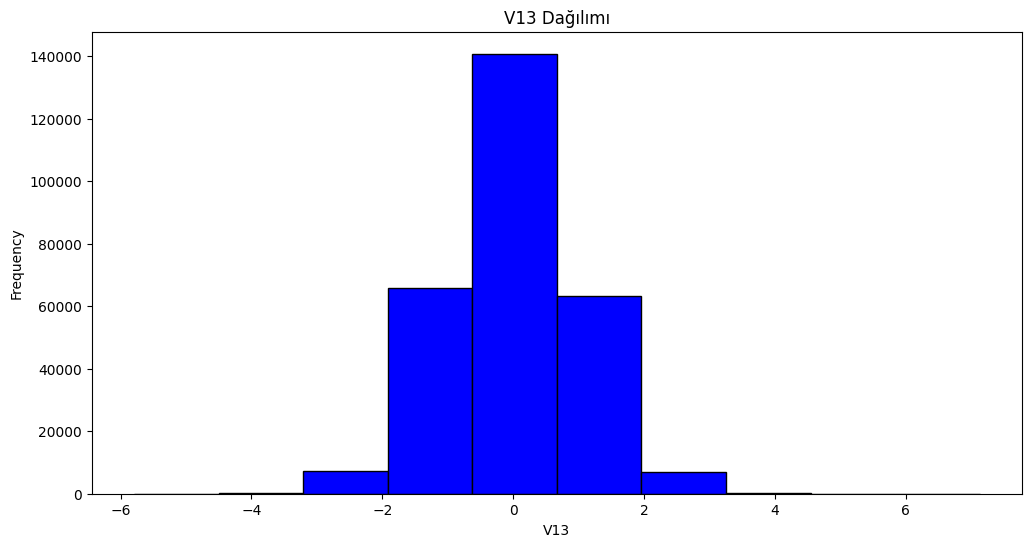

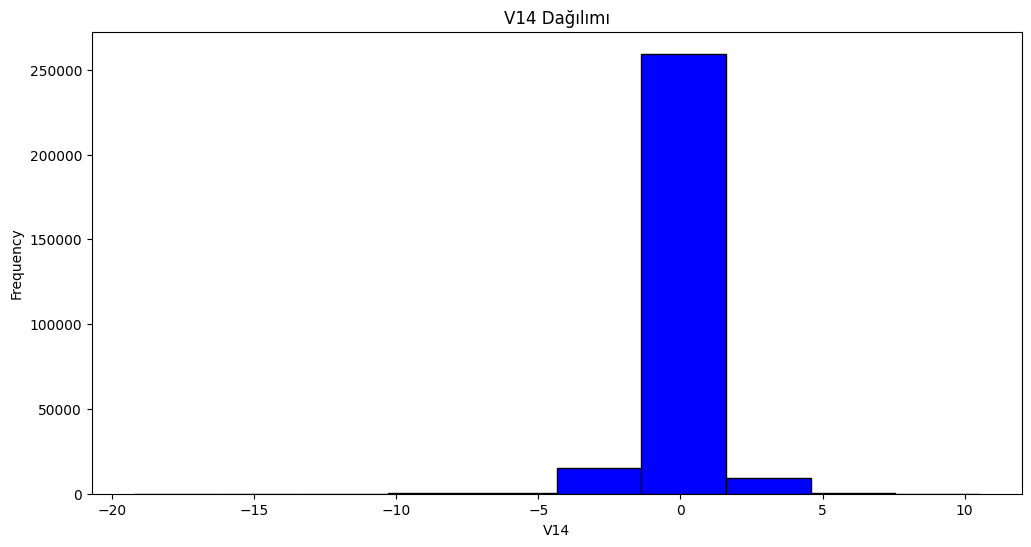

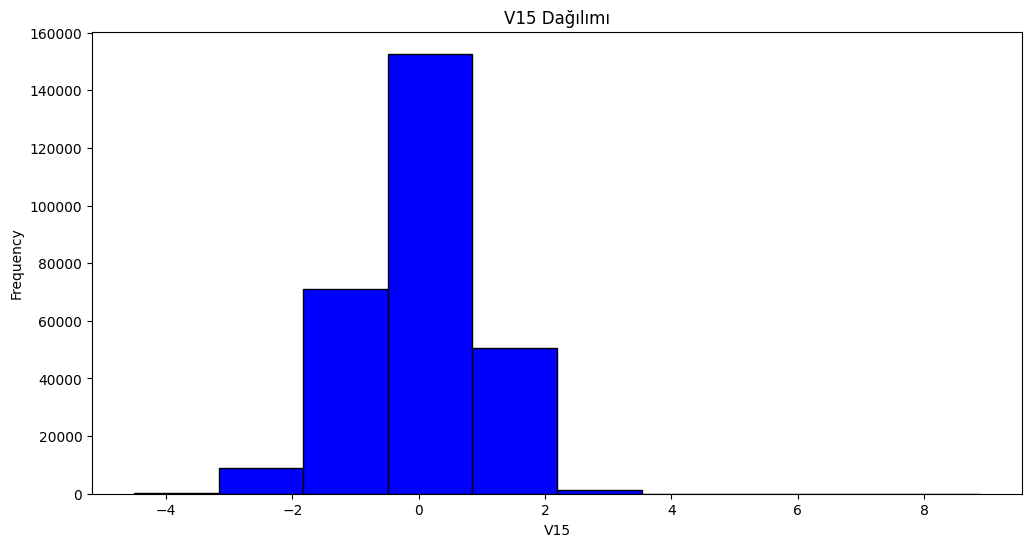

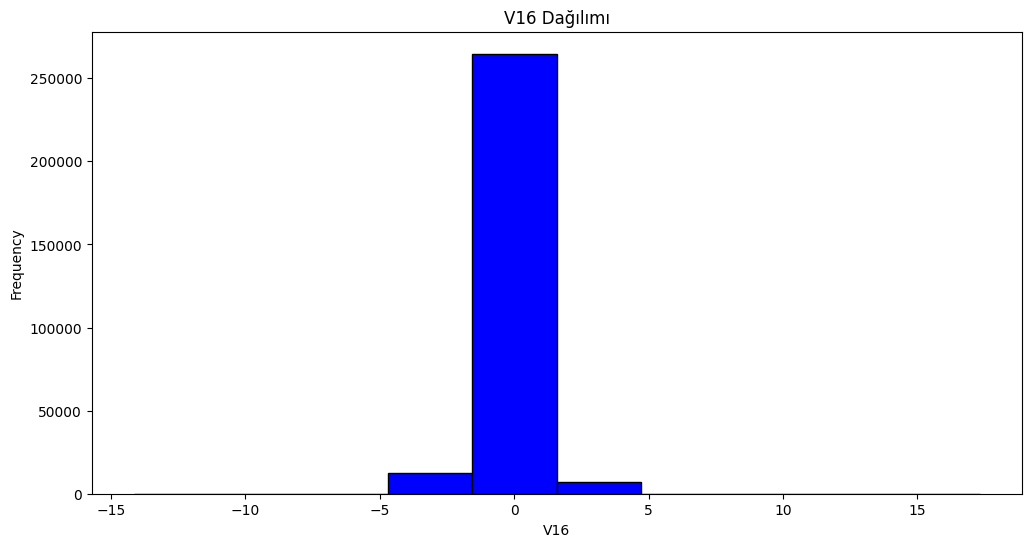

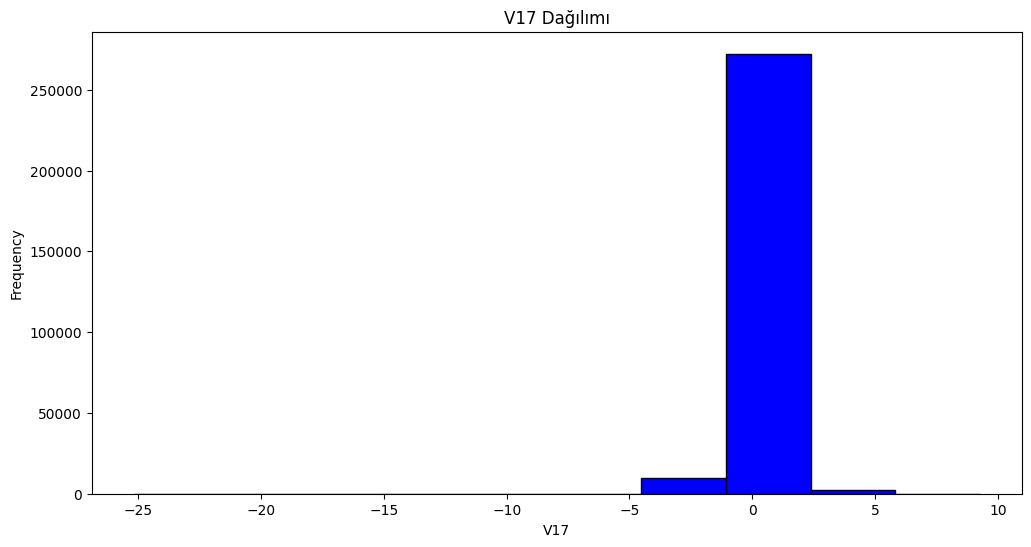

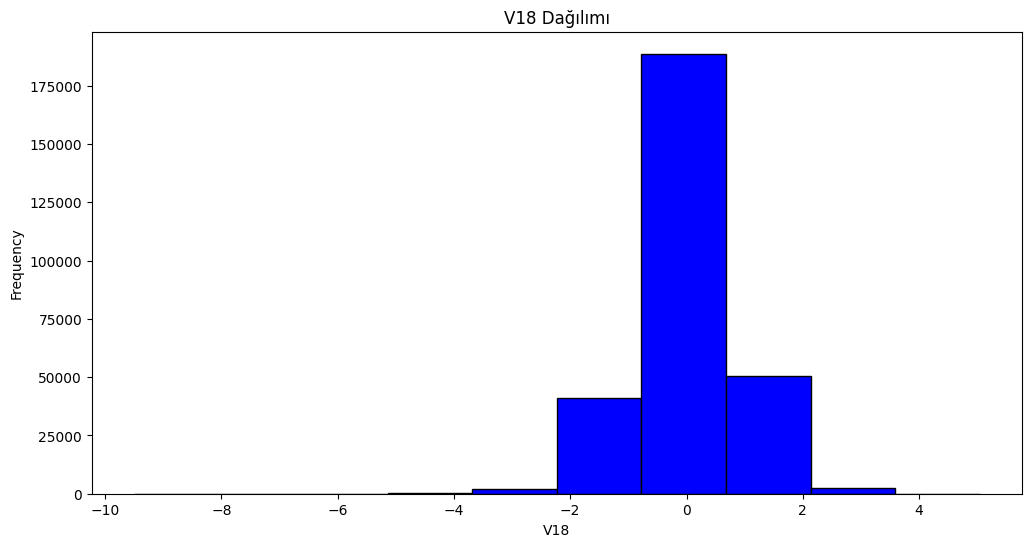

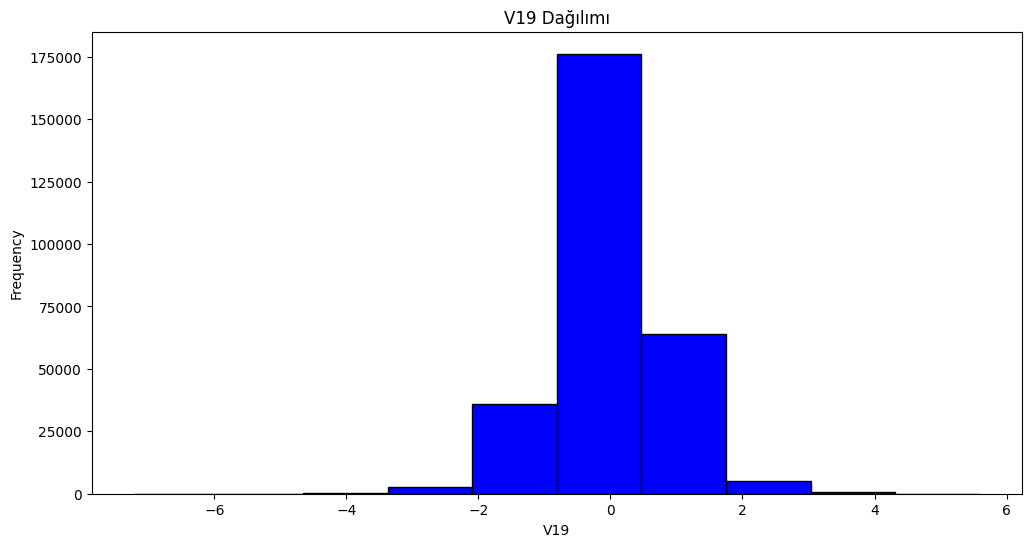

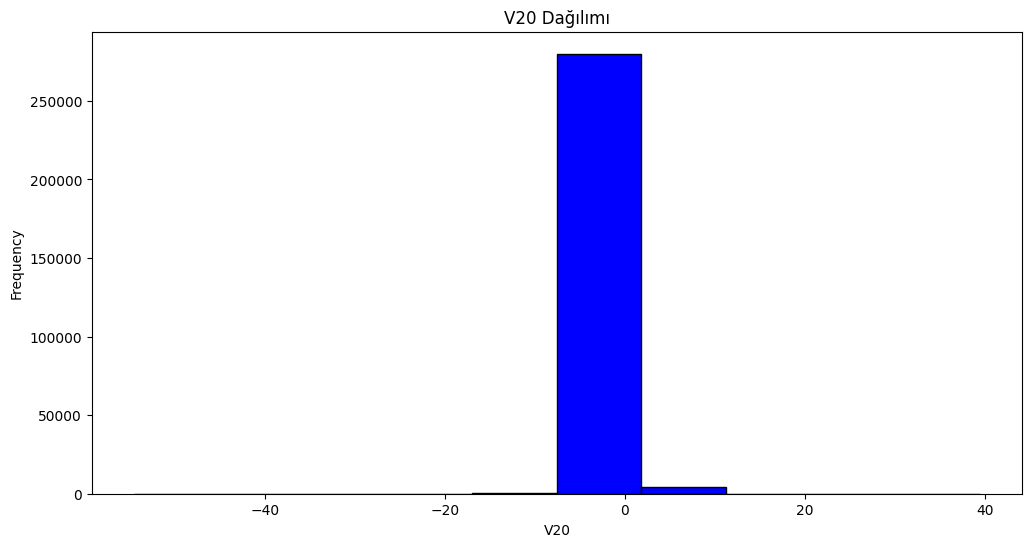

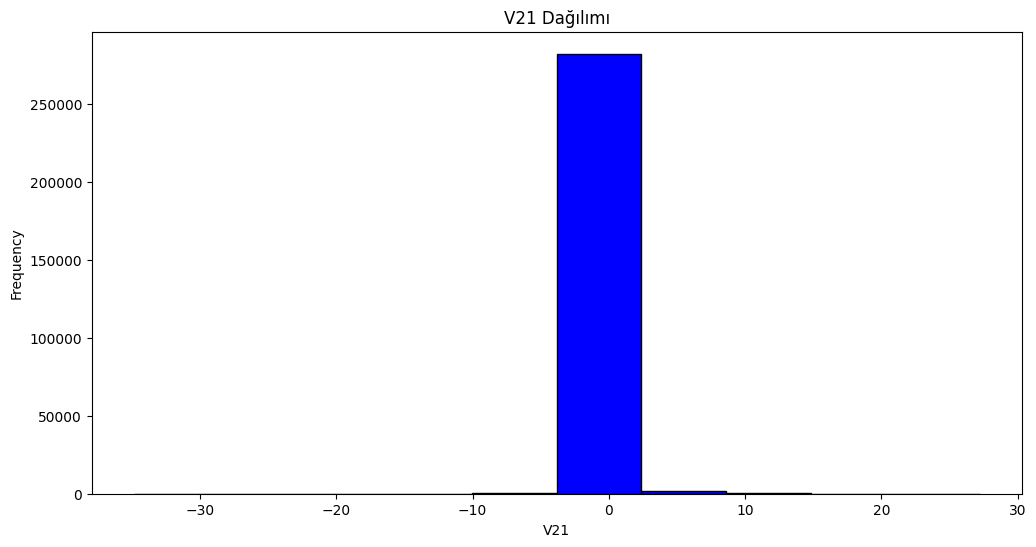

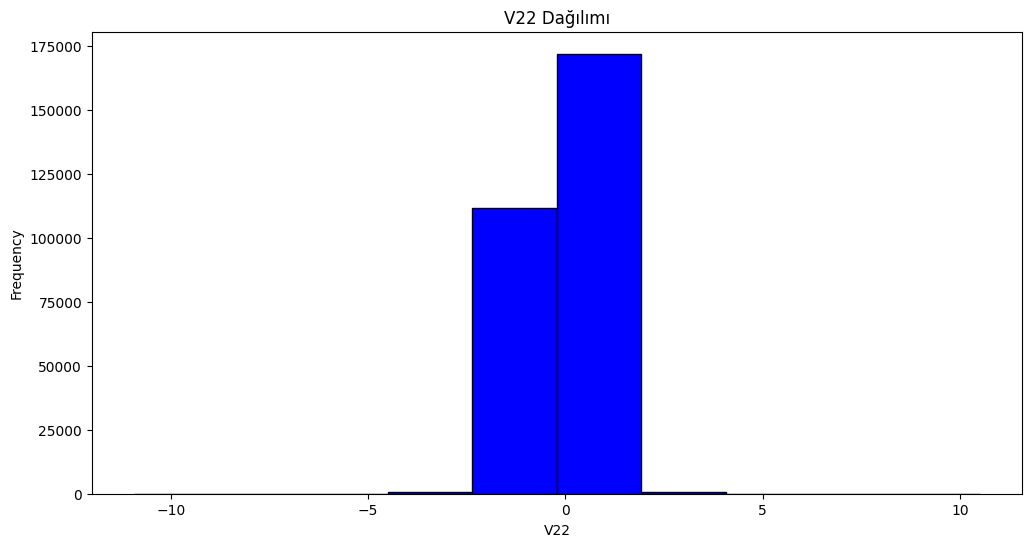

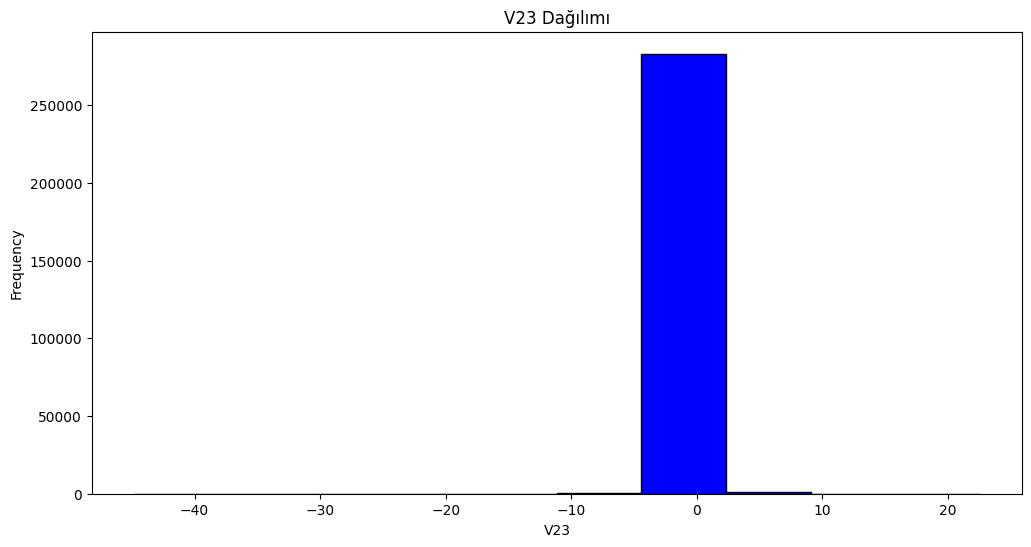

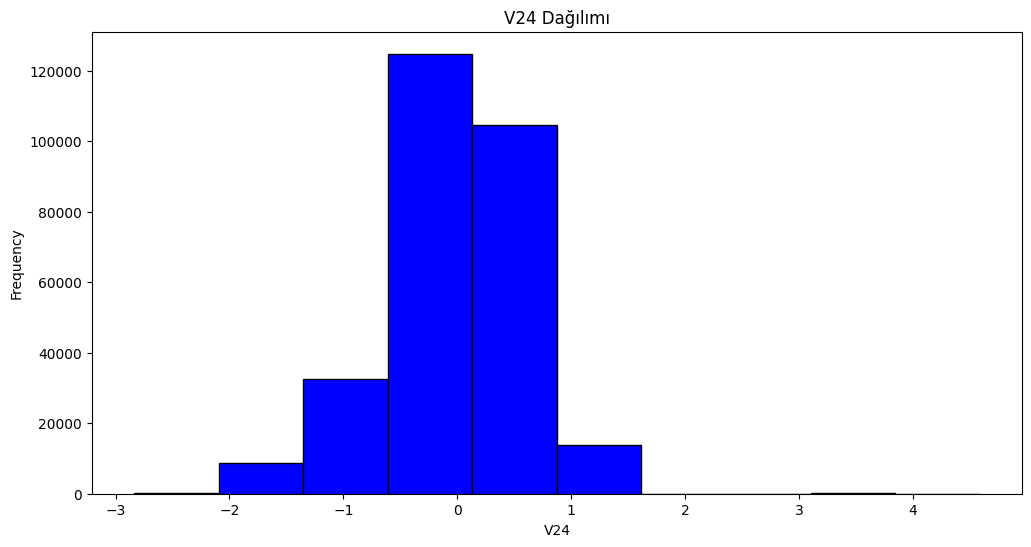

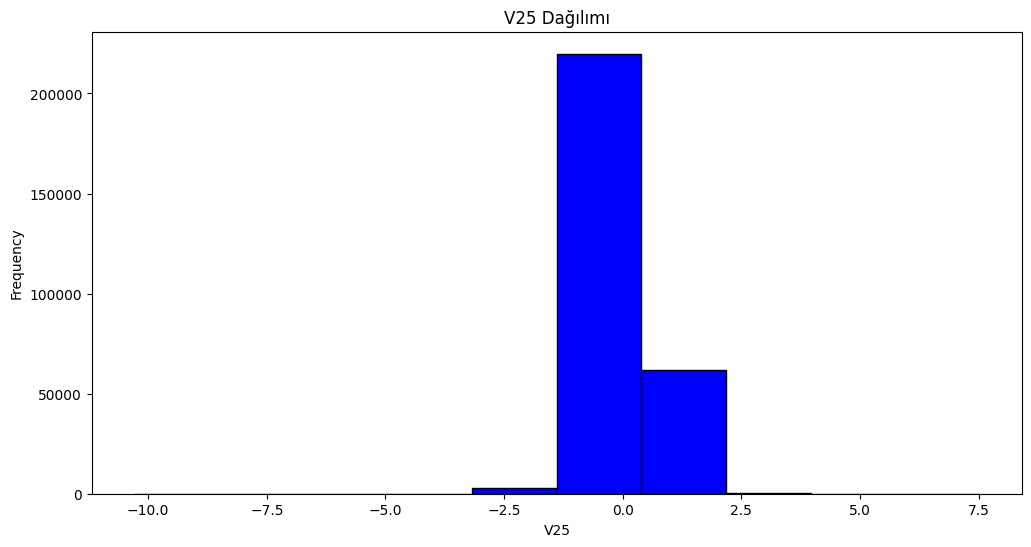

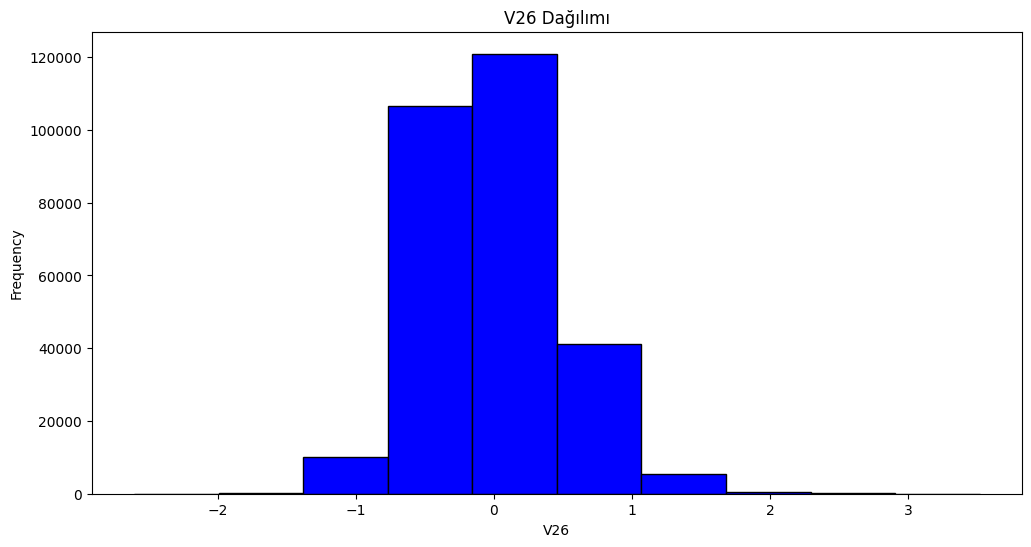

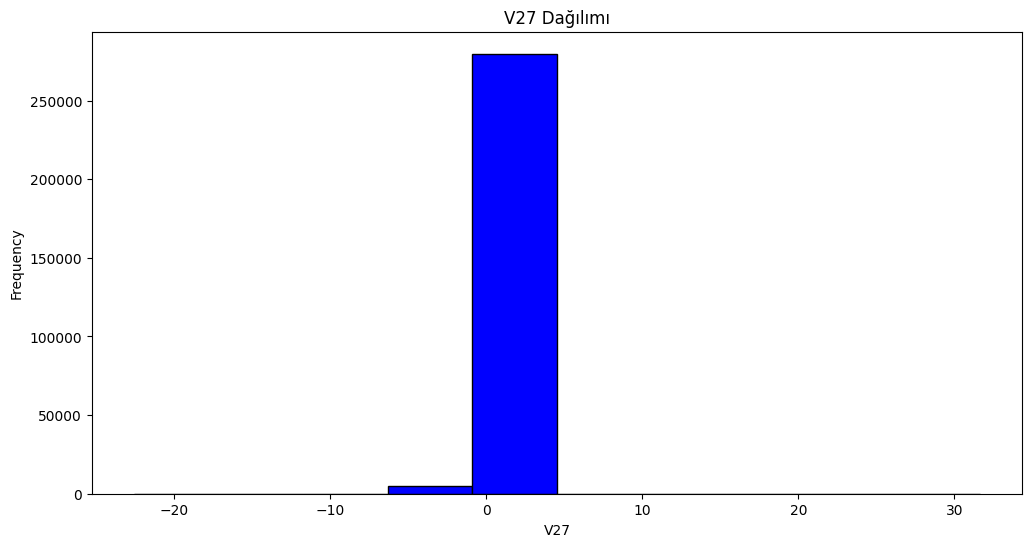

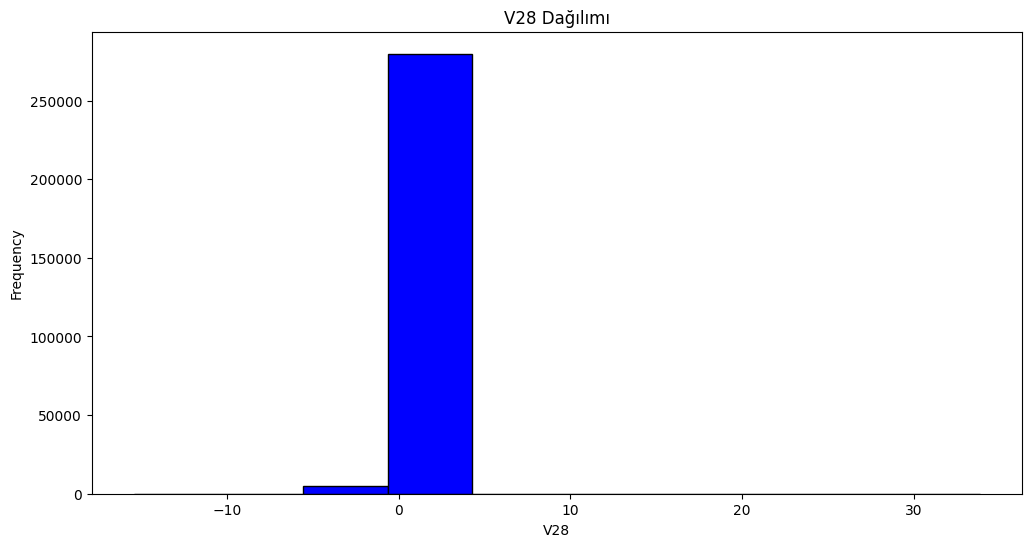

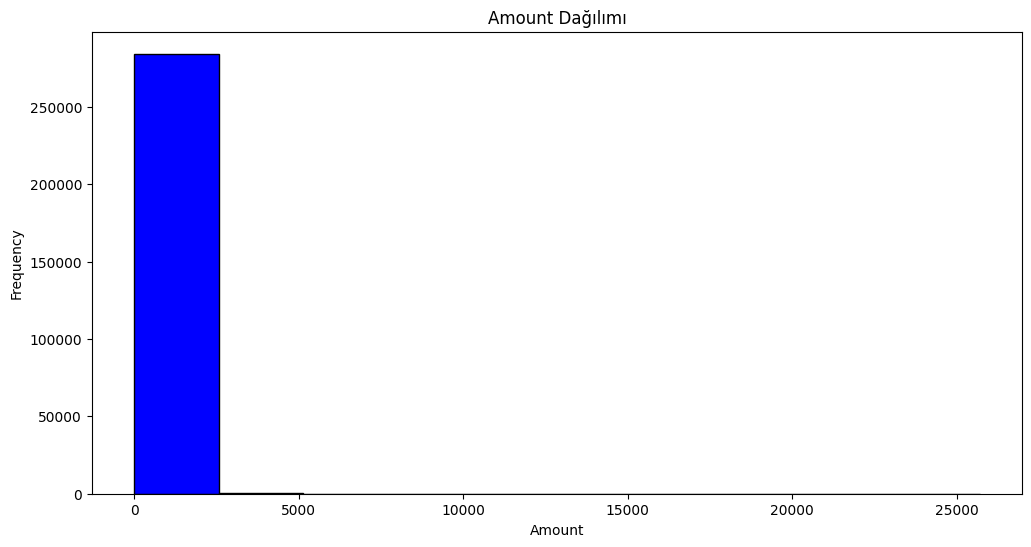

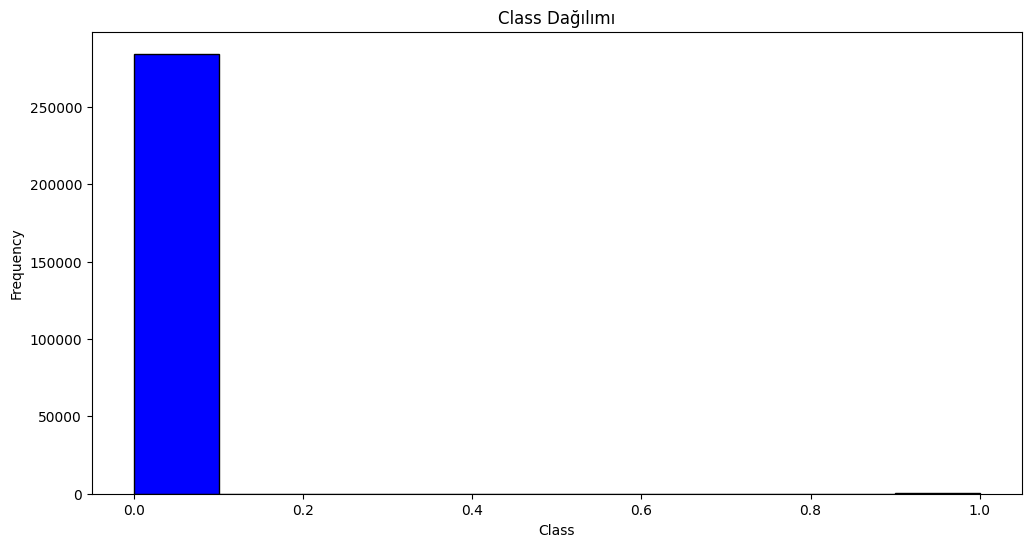

In [ ]:
for column in dataset.columns:
    plt.xlabel(column)
    dataset[column].plot(kind='hist', bins=10, figsize=(12,6), facecolor='blue',edgecolor='black')
    plt.title(f"{column} Dağılımı")
    plt.show();

## Veri setinin özniteliklerinin arasındaki ilişkinin incelenmesi

In [ ]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00e+00,1.17e-01,-1.06e-02,-4.20e-01,-1.05e-01,1.73e-01,-6.30e-02,8.47e-02,-3.69e-02,-8.66e-03,...,4.47e-02,1.44e-01,5.11e-02,-1.62e-02,-2.33e-01,-4.14e-02,-5.13e-03,-9.41e-03,-1.06e-02,-1.23e-02
V1,1.17e-01,1.00e+00,4.14e-16,-1.23e-15,-9.22e-16,1.81e-17,-6.51e-16,-1.01e-15,-2.43e-16,-1.51e-16,...,-2.46e-16,-4.29e-16,6.17e-16,-4.43e-17,-9.61e-16,-1.58e-17,1.20e-16,2.08e-15,-2.28e-01,-1.01e-01
V2,-1.06e-02,4.14e-16,1.00e+00,3.24e-16,-1.12e-15,5.16e-16,2.79e-16,2.06e-16,-5.38e-17,1.98e-17,...,-8.48e-17,1.53e-16,1.63e-16,1.25e-17,-4.48e-16,2.06e-16,-4.97e-16,-5.09e-16,-5.31e-01,9.13e-02
V3,-4.20e-01,-1.23e-15,3.24e-16,1.00e+00,4.71e-16,-6.54e-17,1.63e-15,4.90e-16,-1.27e-15,5.57e-16,...,5.71e-17,-1.13e-15,-4.98e-16,2.69e-19,-1.10e-15,-1.24e-16,1.05e-15,9.78e-16,-2.11e-01,-1.93e-01
V4,-1.05e-01,-9.22e-16,-1.12e-15,4.71e-16,1.00e+00,-1.72e-15,-7.49e-16,-4.10e-16,5.70e-16,6.92e-16,...,-1.95e-16,-6.28e-17,9.16e-17,1.58e-16,6.07e-16,-4.25e-16,3.98e-17,-2.76e-18,9.87e-02,1.33e-01
V5,1.73e-01,1.81e-17,5.16e-16,-6.54e-17,-1.72e-15,1.00e+00,2.41e-16,2.72e-16,7.44e-16,7.39e-16,...,-3.92e-16,1.25e-16,-8.43e-18,-1.15e-15,4.81e-16,4.32e-16,6.59e-16,-5.61e-18,-3.86e-01,-9.50e-02
V6,-6.30e-02,-6.51e-16,2.79e-16,1.63e-15,-7.49e-16,2.41e-16,1.00e+00,1.19e-16,-1.10e-16,4.13e-16,...,5.83e-17,-4.71e-19,1.05e-16,-1.07e-15,4.56e-16,-1.36e-16,-4.45e-16,2.59e-16,2.16e-01,-4.36e-02
V7,8.47e-02,-1.01e-15,2.06e-16,4.90e-16,-4.10e-16,2.72e-16,1.19e-16,1.00e+00,3.34e-16,1.12e-15,...,-2.03e-16,-8.90e-16,-4.39e-16,7.43e-18,-3.09e-16,-9.66e-16,-1.78e-15,-2.78e-16,3.97e-01,-1.87e-01
V8,-3.69e-02,-2.43e-16,-5.38e-17,-1.27e-15,5.70e-16,7.44e-16,-1.10e-16,3.34e-16,1.00e+00,4.36e-16,...,3.89e-16,2.03e-16,6.38e-17,-1.05e-16,-4.65e-16,-1.73e-16,1.30e-16,-6.20e-16,-1.03e-01,1.99e-02
V9,-8.66e-03,-1.51e-16,1.98e-17,5.57e-16,6.92e-16,7.39e-16,4.13e-16,1.12e-15,4.36e-16,1.00e+00,...,1.94e-16,-7.07e-16,-5.21e-16,-1.43e-16,6.76e-16,-7.89e-16,-6.71e-17,1.11e-15,-4.42e-02,-9.77e-02


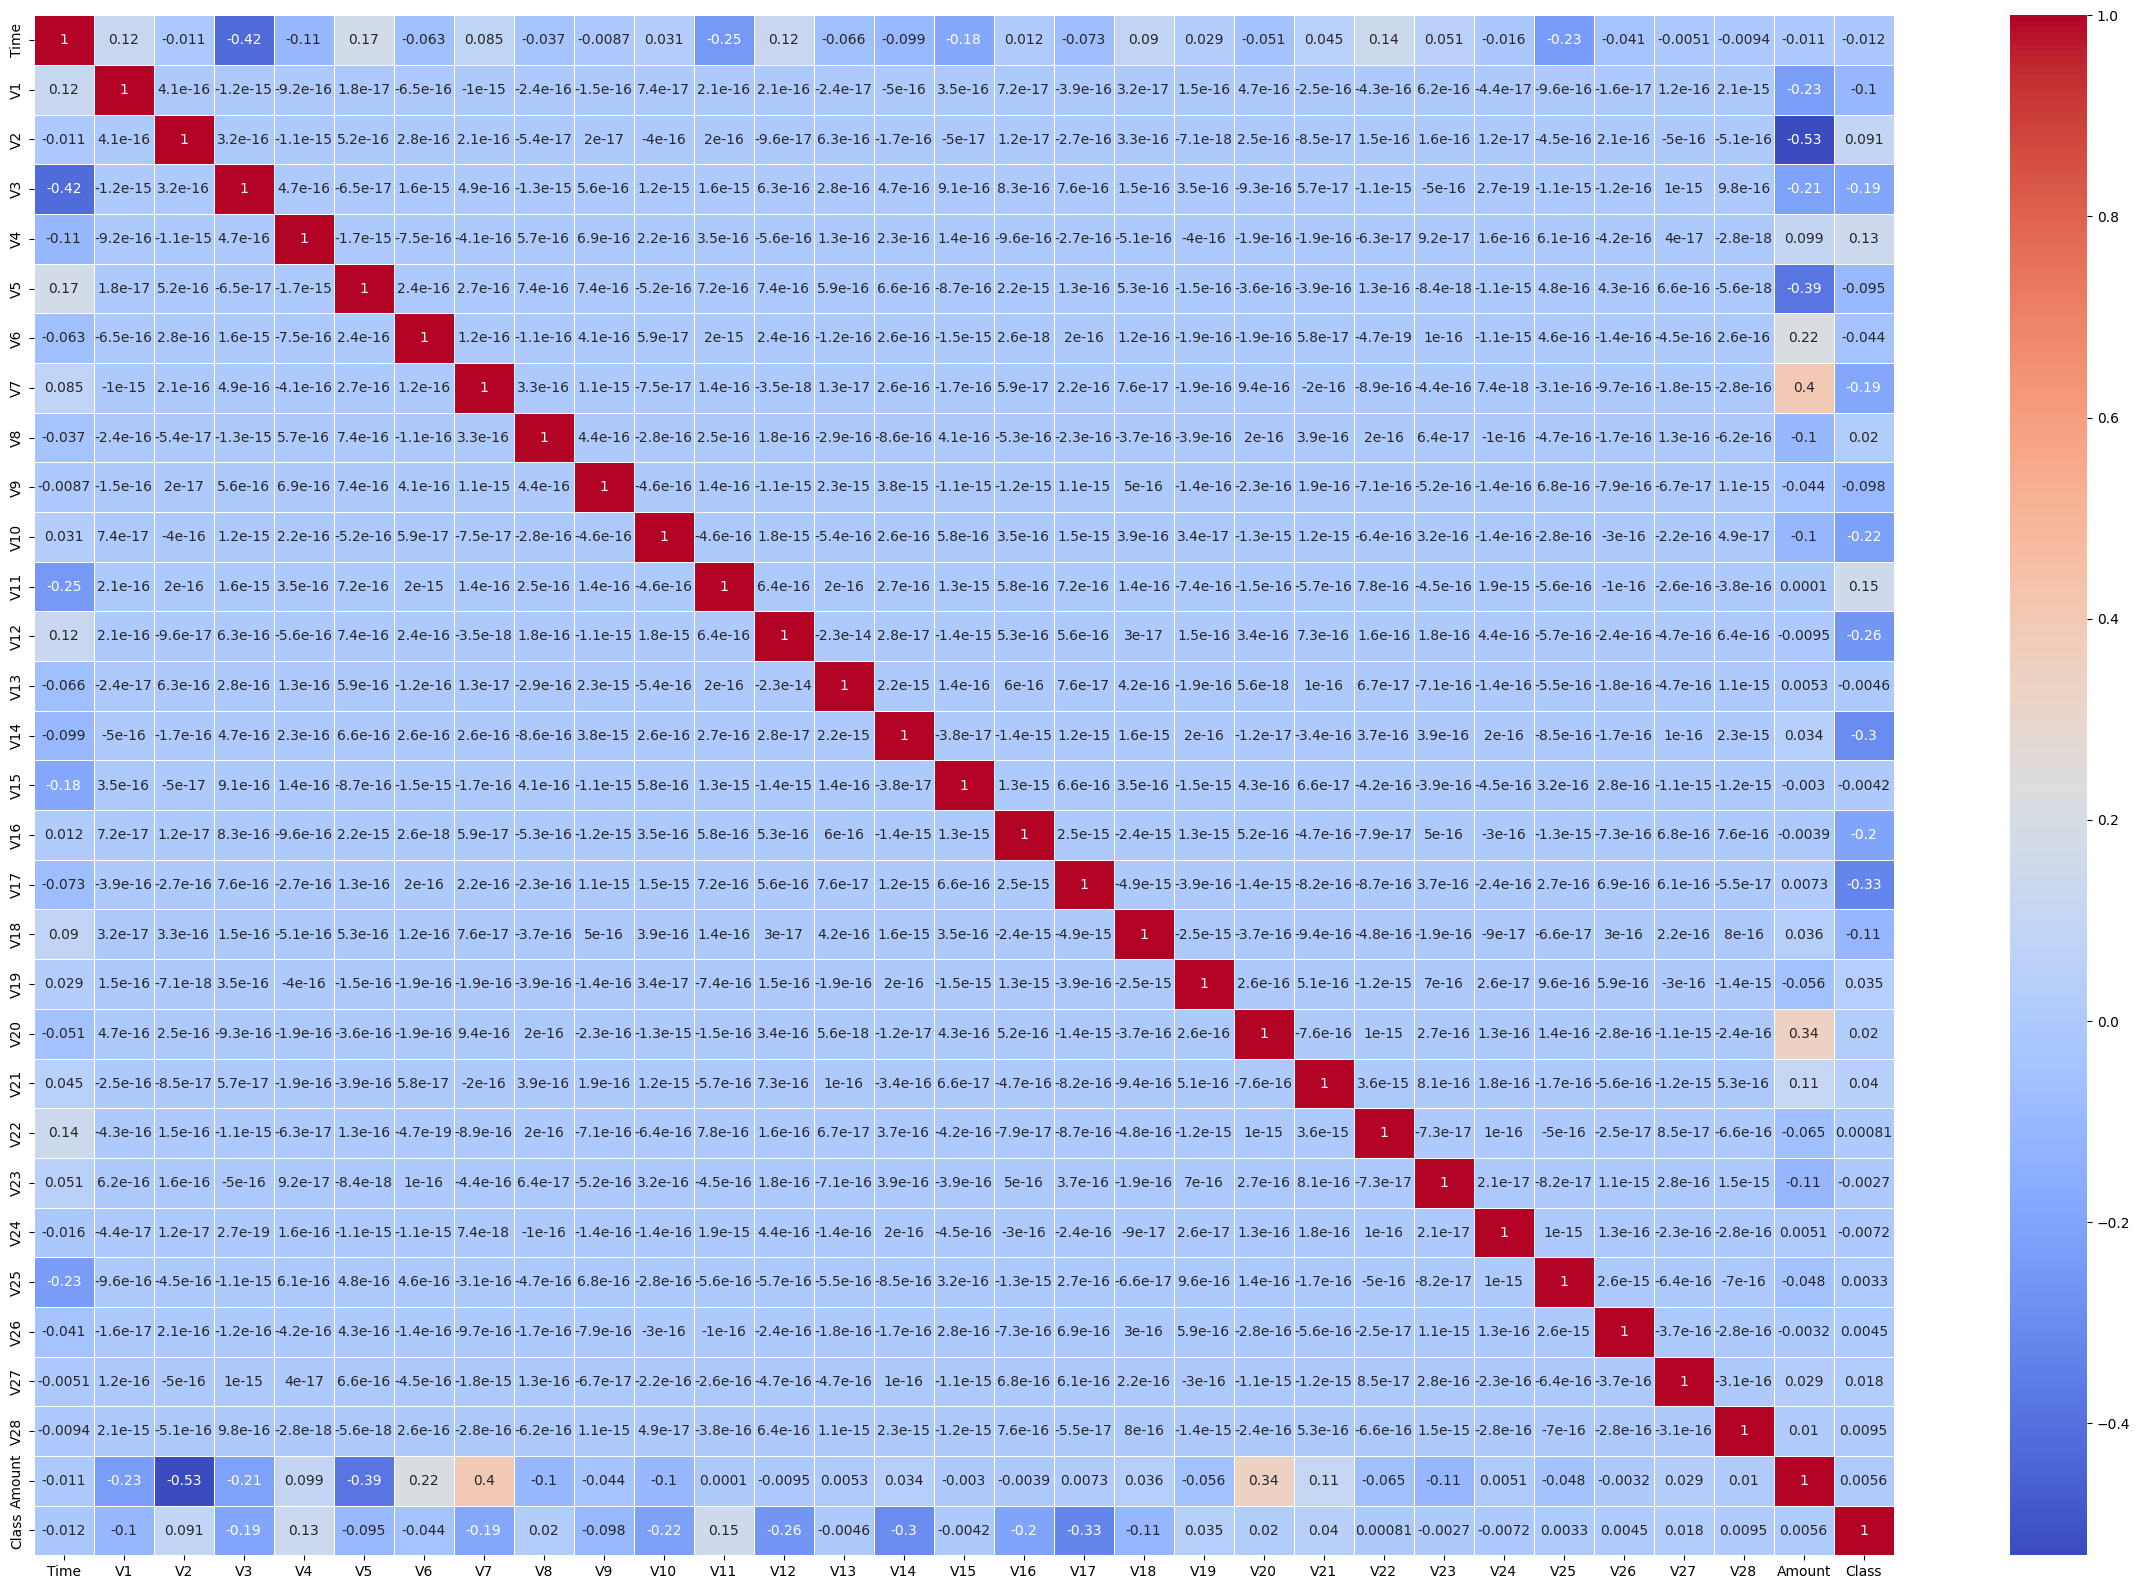

In [ ]:
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", linewidths=.5, ax=ax);

## Veri setinin box plot üzerinde değerlerinin incelenmesi

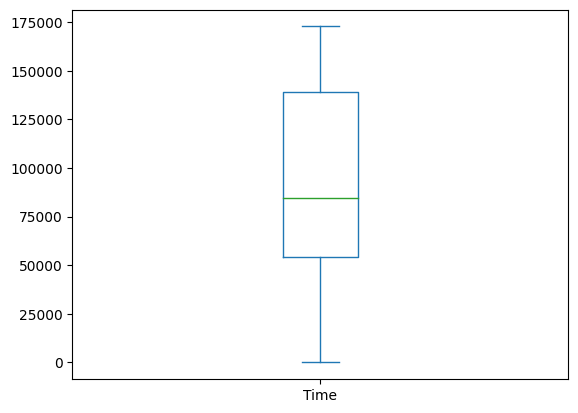

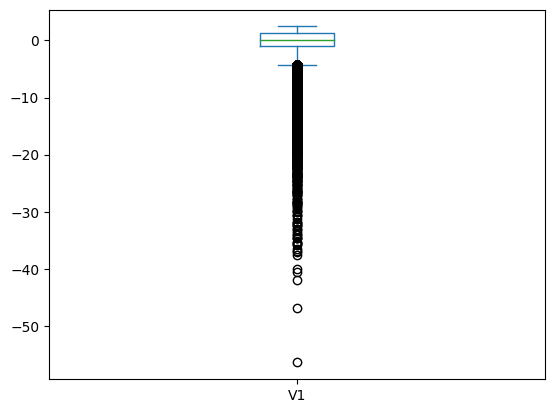

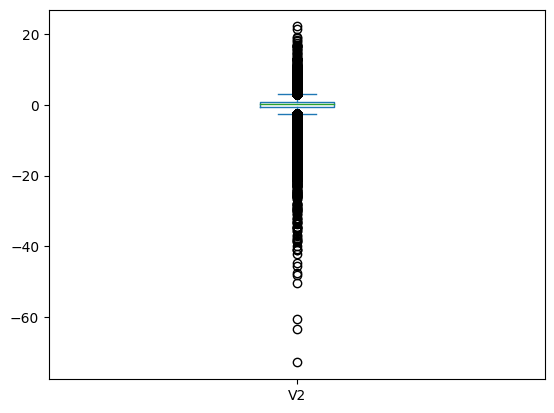

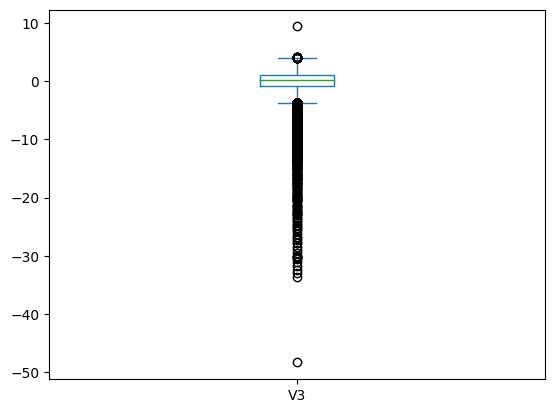

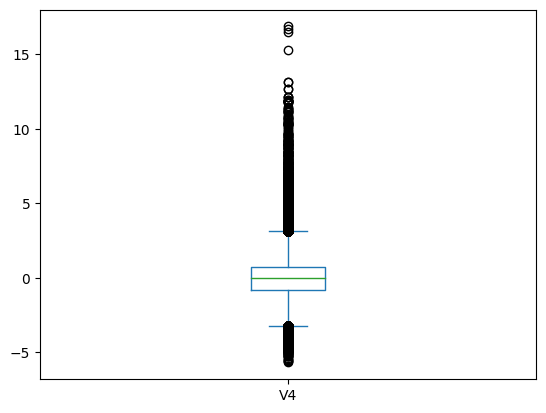

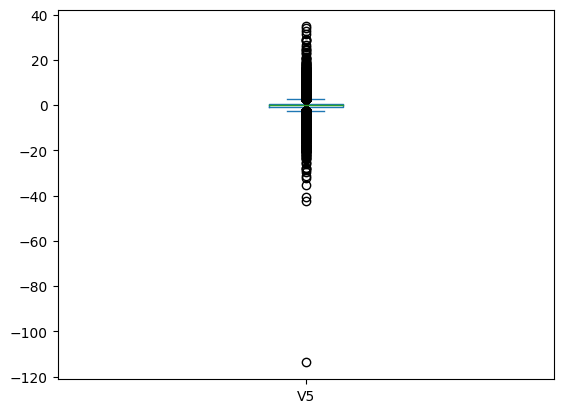

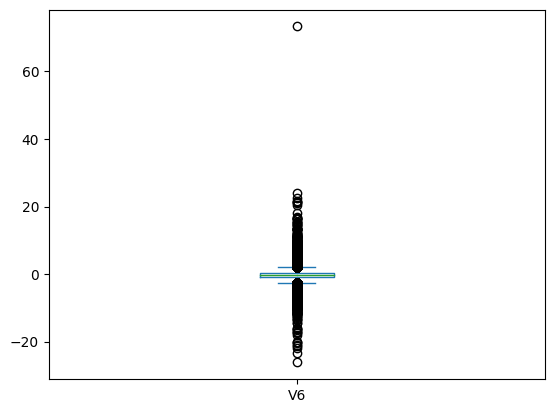

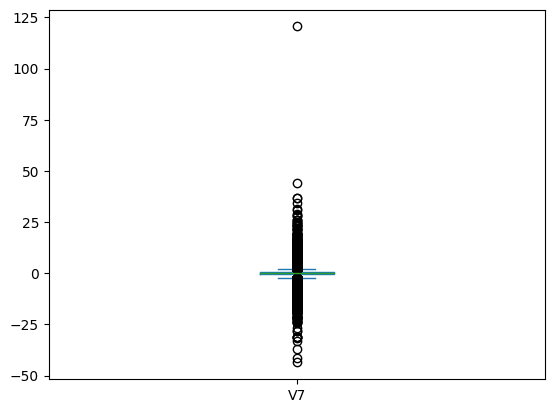

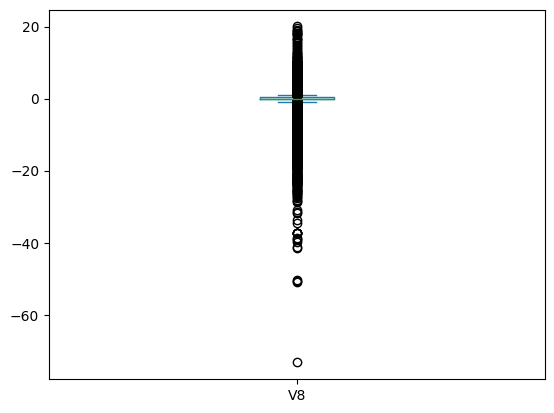

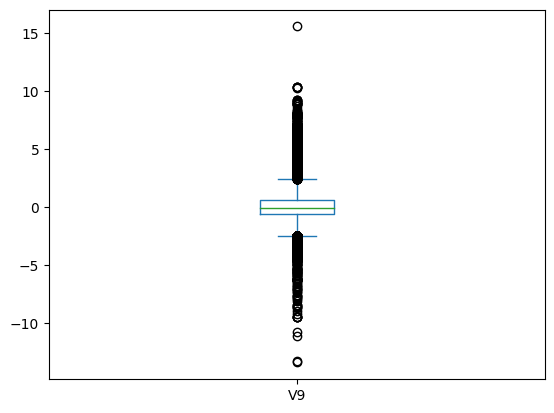

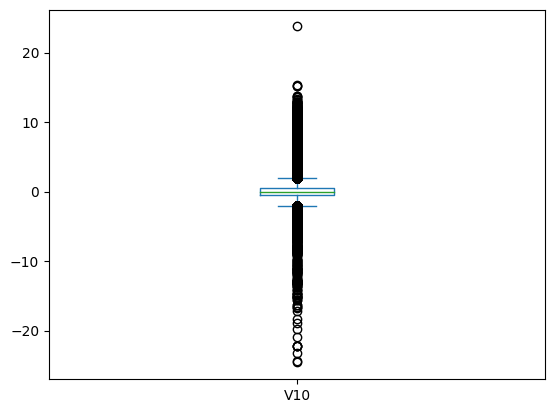

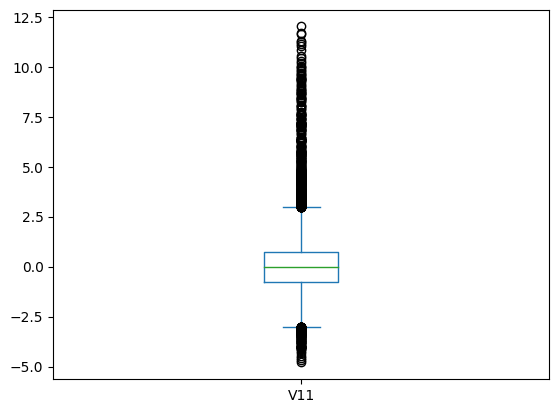

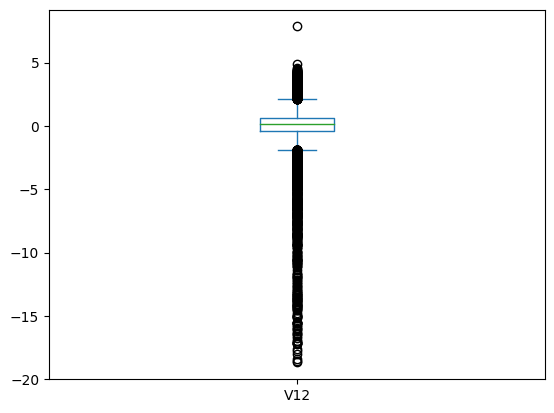

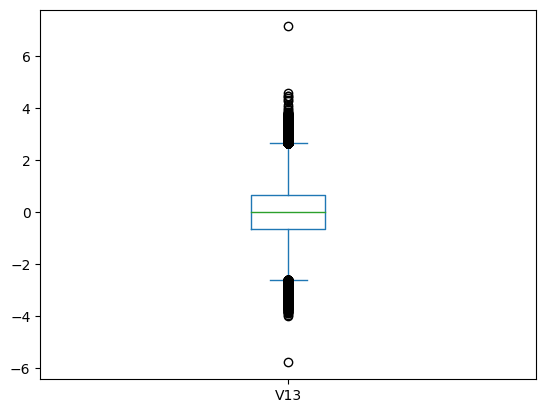

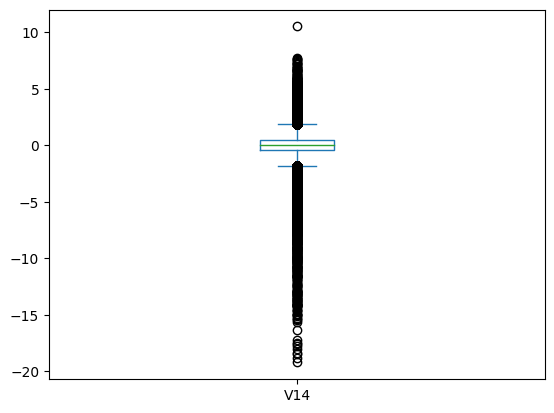

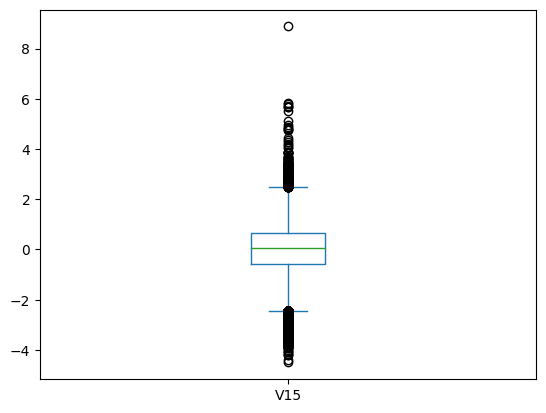

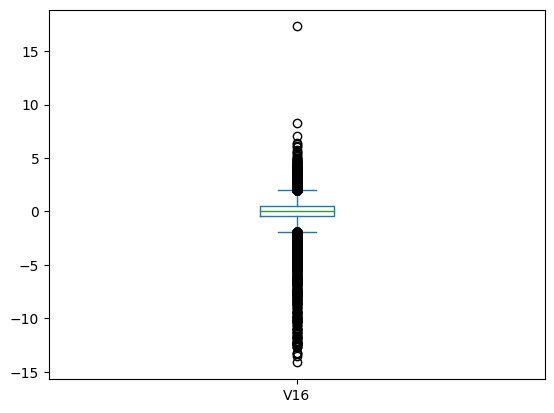

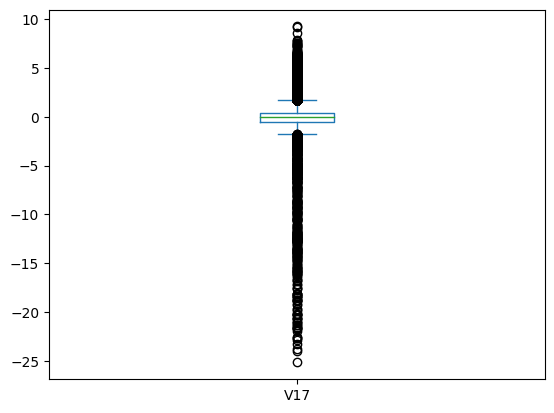

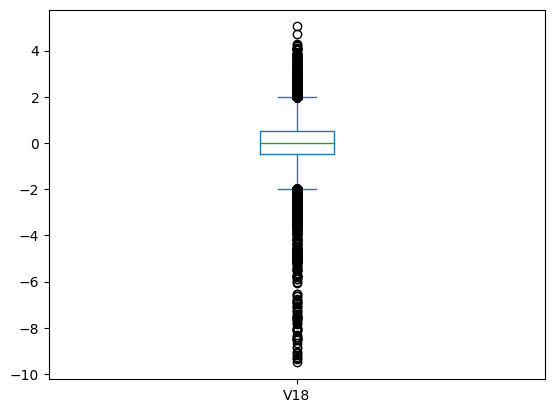

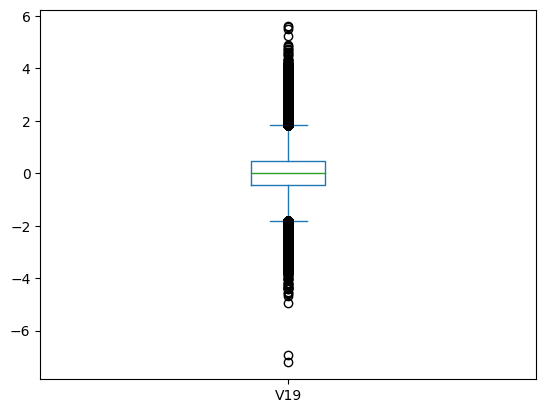

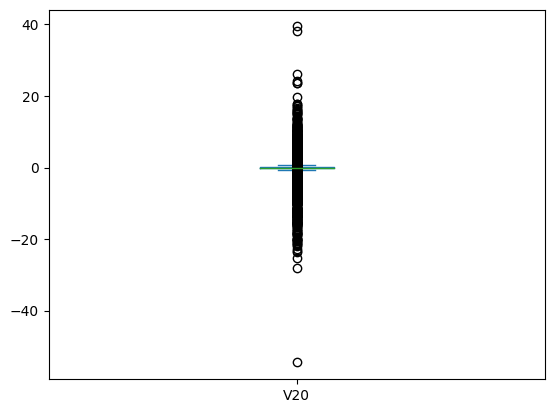

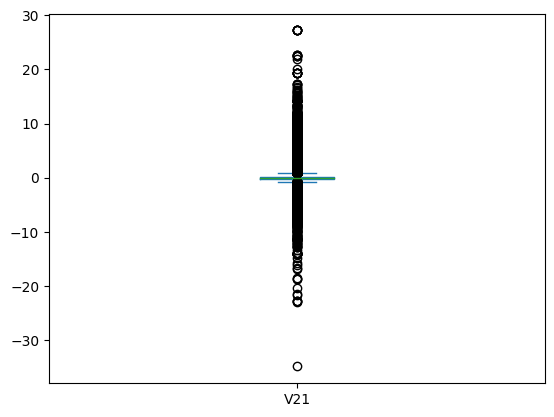

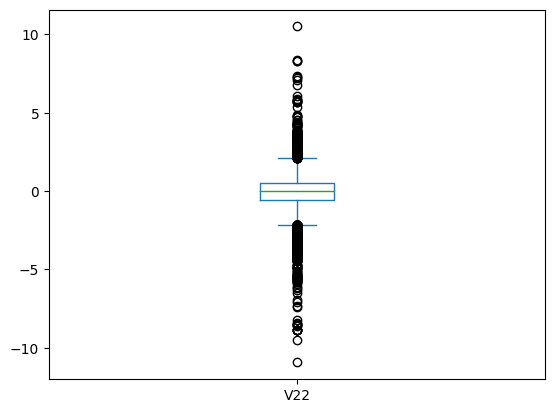

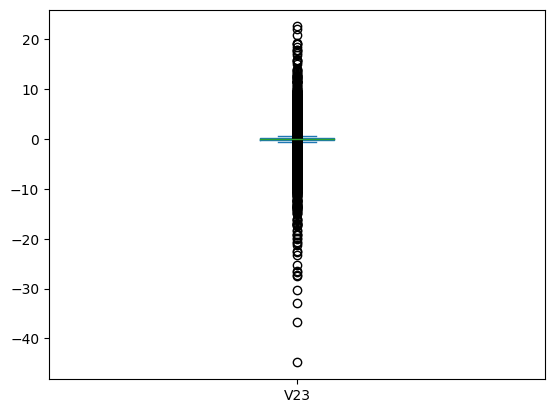

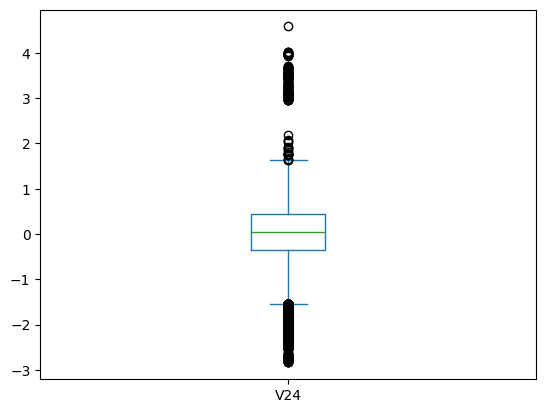

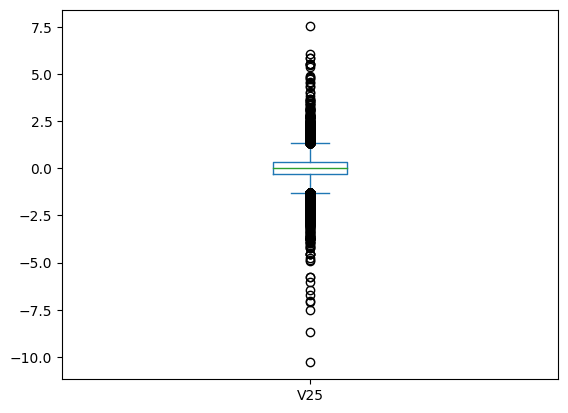

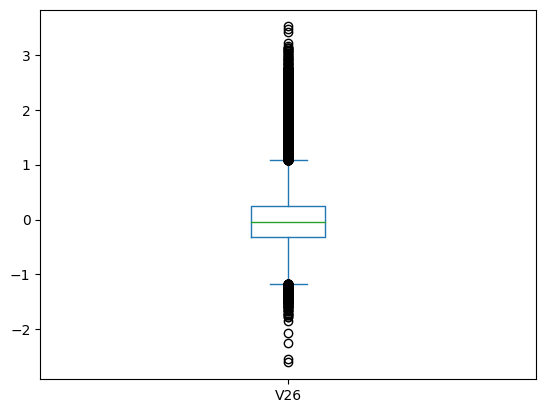

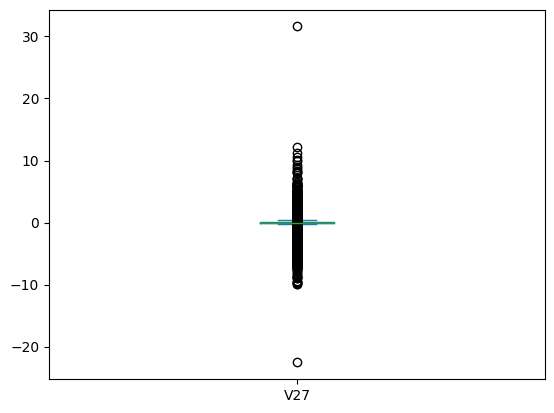

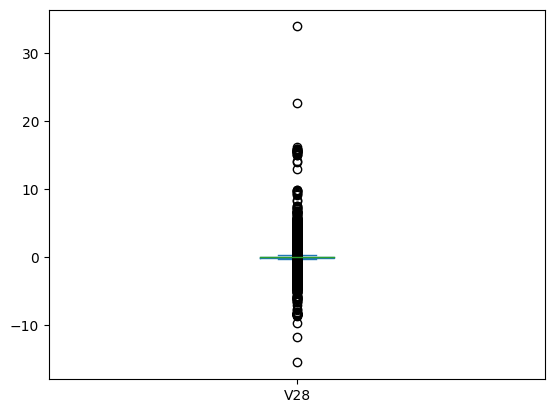

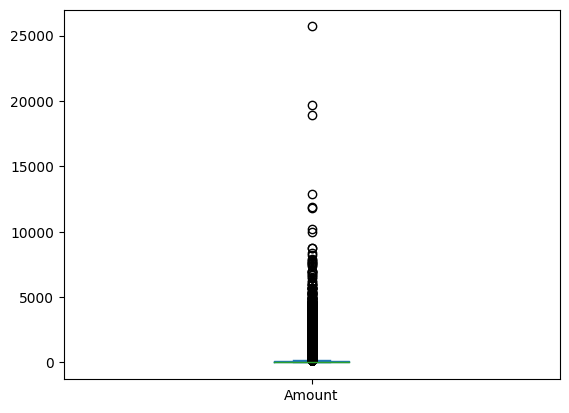

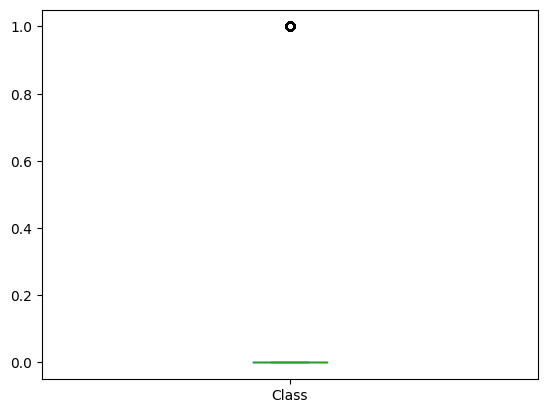

In [ ]:
for i in dataset.columns:
    dataset[i].plot(kind='box')
    plt.show()

## Örnek Sayılarını Eşitleme

<img src="https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png" alt="Under & Oversampling" width="600" height="300">

### Resampling
Yeniden örnekleme(Resampling), azınlık sınıfına yeni örnekler ekleyerek veya çoğunluk sınıfından örnekler çıkarılarak veri setinin daha dengeli hale getirilmesidir.

Undersampling, çoğunluk sınıfına ait örneklerin çıkarılmasıyla veri setini dengeleme tekniğidir.

Oversampling, azınlık sınıfına ait örneklerin kopyalanmasıyla veri setini dengeler.

In [ ]:
class_count_0, class_count_1 = dataset['Class'].value_counts()
class_0 = dataset[dataset['Class'] == 0]
class_1 = dataset[dataset['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


0    492
1    492
Name: Class, dtype: int64


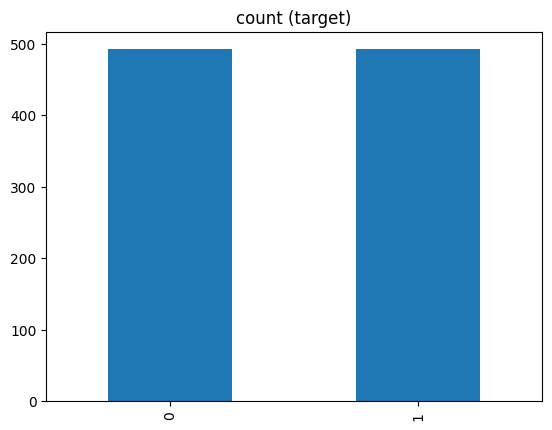

In [ ]:
class_0_under = class_0.sample(class_count_1)
balancing_data = pd.concat([class_0_under, class_1], axis=0)
print(balancing_data['Class'].value_counts())
balancing_data['Class'].value_counts().plot(kind='bar', title='count (target)');

In [ ]:
balancing_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88488,62162.0,1.06,-7.05e-01,1.21,0.89,-1.06,1.06,-1.11,0.64,1.69,...,-0.28,-0.50,0.03,-0.30,0.20,0.45,0.02,1.76e-03,19.95,0
220422,142160.0,-2.19,1.73e+00,-2.37,-1.05,0.19,-1.05,-0.05,-0.64,-0.67,...,1.90,0.33,0.11,-0.46,-0.24,0.10,-0.06,-1.17e-01,9.99,0
8699,11802.0,1.19,-5.63e-04,0.45,0.28,-0.41,-0.60,-0.17,-0.15,1.53,...,-0.22,-0.43,0.06,0.07,0.12,0.92,-0.10,-4.20e-04,35.97,0
218625,141393.0,-1.07,6.92e-01,0.72,-0.94,1.59,-1.00,0.99,-0.07,-0.54,...,-0.32,-1.15,-0.21,0.56,0.63,0.21,-0.07,7.59e-02,9.99,0
57505,47937.0,1.05,-7.67e-02,0.44,1.37,-0.40,-0.01,-0.14,0.23,0.34,...,-0.05,-0.10,-0.05,0.19,0.52,-0.34,0.02,7.95e-03,34.88,0


In [ ]:
balancing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 88488 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64


## Eğitim ve Test setlerinin ayrılması


In [ ]:
y = balancing_data['Class']
X = balancing_data.drop(['Class'], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
88488,62162.0,1.06,-7.05e-01,1.21,0.89,-1.06,1.06,-1.11,0.64,1.69,...,-0.28,-0.28,-0.50,0.03,-0.30,0.20,0.45,0.02,1.76e-03,19.95
220422,142160.0,-2.19,1.73e+00,-2.37,-1.05,0.19,-1.05,-0.05,-0.64,-0.67,...,-0.95,1.90,0.33,0.11,-0.46,-0.24,0.10,-0.06,-1.17e-01,9.99
8699,11802.0,1.19,-5.63e-04,0.45,0.28,-0.41,-0.60,-0.17,-0.15,1.53,...,-0.11,-0.22,-0.43,0.06,0.07,0.12,0.92,-0.10,-4.20e-04,35.97
218625,141393.0,-1.07,6.92e-01,0.72,-0.94,1.59,-1.00,0.99,-0.07,-0.54,...,0.06,-0.32,-1.15,-0.21,0.56,0.63,0.21,-0.07,7.59e-02,9.99
57505,47937.0,1.05,-7.67e-02,0.44,1.37,-0.40,-0.01,-0.14,0.23,0.34,...,-0.27,-0.05,-0.10,-0.05,0.19,0.52,-0.34,0.02,7.95e-03,34.88


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modellerin Oluşturulması

In [ ]:
def show_roc_curve(model, model_name, X_test, y_test):
  y_scores = model.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic of ' + model_name)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve of ' + model_name)
  plt.show()

In [ ]:
model_performance = pd.DataFrame(columns=['Training Time', 'Test Time', 'Accuracy','Recall','Precision','F1-Score'])

In [ ]:
def add_scores(y_test, y_test_pred, model_name, training_time, test_time):
  acc = accuracy_score(y_test, y_test_pred)
  rec = recall_score(y_test, y_test_pred)
  prec = precision_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  model_performance.loc[model_name] = [training_time, test_time, acc, rec, prec, f1]
  print(model_performance.sort_values("F1-Score", ascending=False))

In [ ]:
def accuracy_graph(gscv):
  test_scores = gscv.cv_results_['mean_test_score']
  train_scores = gscv.cv_results_['mean_train_score'] 

  plt.plot(test_scores, label='test')
  plt.plot(train_scores, label='train')
  plt.legend(loc='best')
  plt.show()

## KNN

KNN en basit anlamı ile içerisinde tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün en yakın komşularının hangi sınıfta yoğun olduğu bilgisi üzerinden sınıfını tahmin etmeye dayanır.

In [ ]:
knn = KNeighborsClassifier(n_jobs=-1)
param_grid = {
    'n_neighbors': np.arange(1, 20, 2), 
    'p': np.arange(1,4)
}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X_train, y_train)
pd.DataFrame(knn_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,6,9,3,15,18
mean_fit_time,0.0,0.0,0.0,0.0,0.01
std_fit_time,0.0,0.0,0.0,0.0,0.01
mean_score_time,0.01,0.1,0.01,0.01,0.13
std_score_time,0.0,0.02,0.0,0.0,0.04
param_n_neighbors,5,7,3,11,13
param_p,1,1,1,1,1
params,"{'n_neighbors': 5, 'p': 1}","{'n_neighbors': 7, 'p': 1}","{'n_neighbors': 3, 'p': 1}","{'n_neighbors': 11, 'p': 1}","{'n_neighbors': 13, 'p': 1}"
split0_test_score,0.96,0.95,0.95,0.95,0.95
split1_test_score,0.92,0.91,0.92,0.92,0.92
split2_test_score,0.92,0.93,0.93,0.91,0.91


In [ ]:
print(f"En iyi parametreler {knn_gscv.best_params_}, en iyi skor {knn_gscv.best_score_}")

En iyi parametreler {'n_neighbors': 5, 'p': 1}, en iyi skor 0.933911150528098


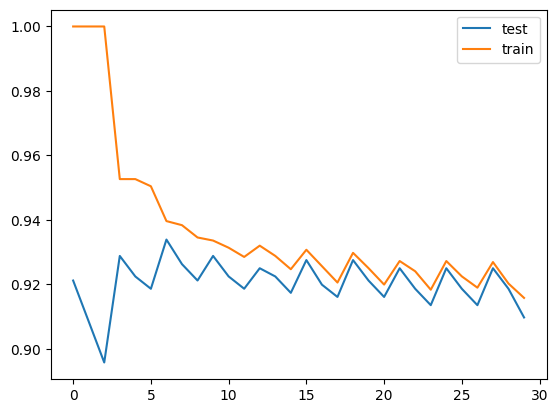

In [ ]:
accuracy_graph(knn_gscv)

In [ ]:
start = time.time()
best_knn = KNeighborsClassifier(n_neighbors=5, p=1)
best_knn.fit(X_train, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.002732992172241211s


In [ ]:
start = time.time()
y_test_pred = best_knn.predict(X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.023930788040161133s


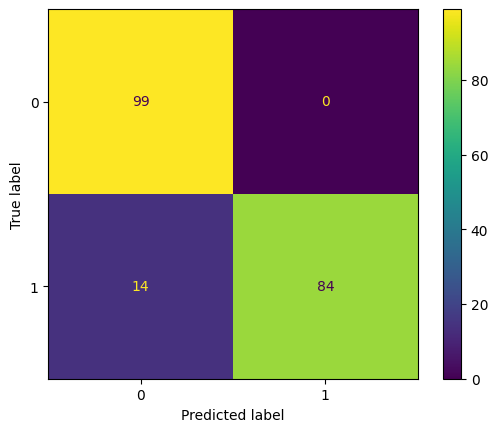

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.88      1.00      0.93        99
       Fraud       1.00      0.86      0.92        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



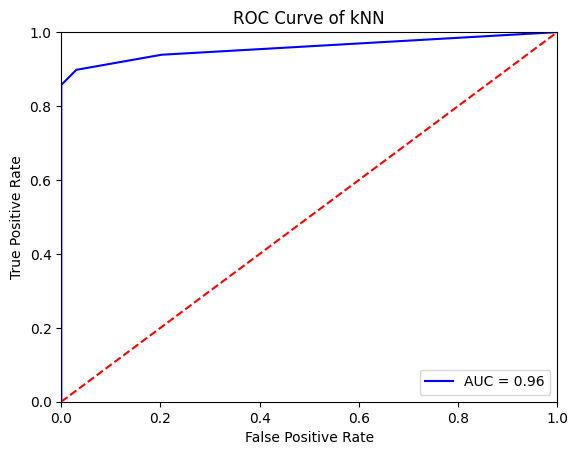

In [ ]:
show_roc_curve(best_knn, 'kNN', X_test, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "kNN", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN       2.73e-03       0.02      0.93    0.86        1.0      0.92


## Naive Bayes

Naive Bayes sınıflandırıcısının temeli Bayes teoremine dayanır. Tembel bir öğrenme algoritmasıdır aynı zamanda dengesiz veri kümelerinde de çalışabilir. Algoritmanın çalışma şekli bir eleman için her durumun olasılığını hesaplar ve olasılık değeri en yüksek olana göre sınıflandırır.

In [ ]:
nb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nb_gscv = GridSearchCV(nb, param_grid, cv=5, return_train_score=True)
nb_gscv.fit(X_train, y_train);
pd.DataFrame(nb_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,50,75,73,72,71
mean_fit_time,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_var_smoothing,0.0,0.0,0.0,0.0,0.0
params,{'var_smoothing': 2.848035868435799e-05},{'var_smoothing': 1.519911082952933e-07},{'var_smoothing': 2.310129700083158e-07},{'var_smoothing': 2.848035868435799e-07},{'var_smoothing': 3.5111917342151277e-07}
split0_test_score,0.94,0.94,0.94,0.94,0.94
split1_test_score,0.92,0.92,0.92,0.92,0.92
split2_test_score,0.9,0.9,0.9,0.9,0.9
split3_test_score,0.92,0.92,0.92,0.92,0.92


In [ ]:
print(f"En iyi parametreler {nb_gscv.best_params_}, en iyi skor {nb_gscv.best_score_}")

En iyi parametreler {'var_smoothing': 0.0002848035868435802}, en iyi skor 0.9237442554220753


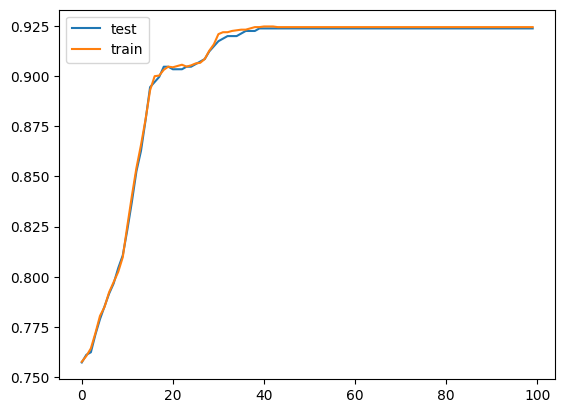

In [ ]:
accuracy_graph(nb_gscv)

In [ ]:
start = time.time()
best_nb = GaussianNB(var_smoothing=0.0002848035868435802)
best_nb.fit(X_train, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.0033583641052246094s


In [ ]:
start = time.time()
y_test_pred = best_nb.predict(X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.0010607242584228516s


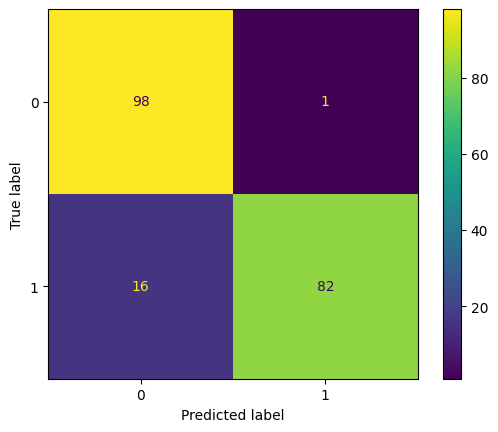

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.86      0.99      0.92        99
       Fraud       0.99      0.84      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



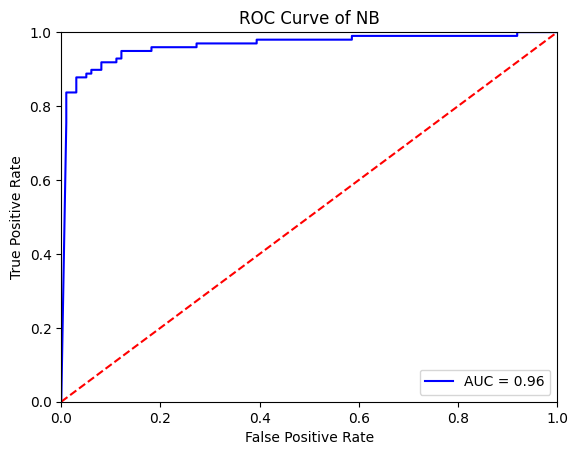

In [ ]:
show_roc_curve(best_nb, 'NB', X_test, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "NB", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
kNN       2.73e-03   2.39e-02      0.93    0.86       1.00      0.92
NB        3.36e-03   1.06e-03      0.91    0.84       0.99      0.91


## Logistic Regression

Lojistik regresyon analizi sınıflama ve atama işlemi yapmaya yardımcı olan bir regresyon yöntemidir. Ayırma (Diskriminant) analizi verilerin sınıflandırılması ve belirli olasılıklara göre belirli sınıflara atanmasını sağlayan bir yöntemdir.

In [ ]:
lr = LogisticRegression(max_iter=500)
param_grid = {
    'solver': np.array(['newton-cg', 'lbfgs', 'liblinear']), 
    'penalty': np.array(['l2']), 
    'C': np.array([100, 10, 1.0, 0.1, 0.01])
}
lr_gscv = GridSearchCV(lr, param_grid, cv=5, return_train_score=True)
lr_gscv.fit(X_train, y_train);
pd.DataFrame(lr_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,0,1,2,3,4
mean_fit_time,0.12,0.28,0.01,0.06,0.15
std_fit_time,0.04,0.07,0.0,0.01,0.12
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_C,100.0,100.0,100.0,10.0,10.0
param_penalty,l2,l2,l2,l2,l2
param_solver,newton-cg,lbfgs,liblinear,newton-cg,lbfgs
params,"{'C': 100.0, 'penalty': 'l2', 'solver': 'newto...","{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}","{'C': 100.0, 'penalty': 'l2', 'solver': 'libli...","{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...","{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}"
split0_test_score,0.95,0.95,0.96,0.96,0.96
split1_test_score,0.93,0.93,0.92,0.92,0.92


In [ ]:
print(f"En iyi parametreler {lr_gscv.best_params_}, en iyi skor {lr_gscv.best_score_}")

En iyi parametreler {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}, en iyi skor 0.9390066919293719


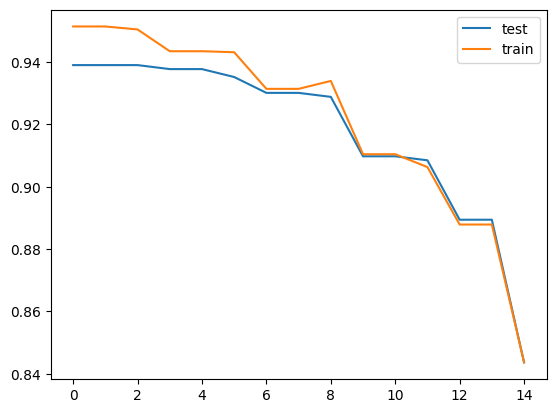

In [ ]:
accuracy_graph(lr_gscv)

In [ ]:
start = time.time()
best_lr = LogisticRegression(max_iter=500, solver="newton-cg", penalty="l2", C=100.0)
best_lr.fit(X_train, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.046582937240600586s


In [ ]:
start = time.time()
y_test_pred = best_lr.predict(X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.0021562576293945312s


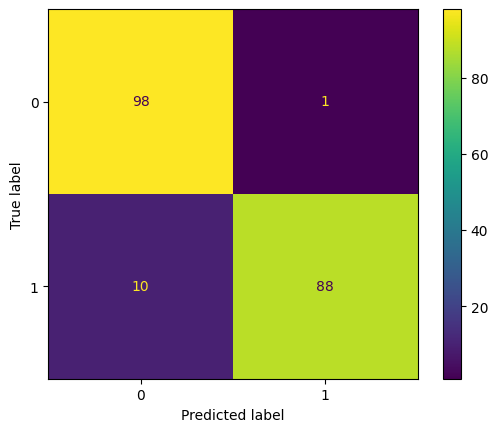

In [ ]:
y_test_pred = best_lr.predict(X_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.91      0.99      0.95        99
       Fraud       0.99      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.95      0.94      0.94       197
weighted avg       0.95      0.94      0.94       197



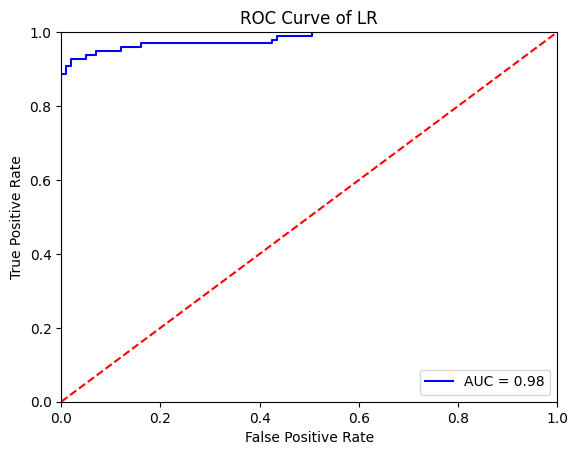

In [ ]:
show_roc_curve(best_lr, 'LR', X_test, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "LR", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
LR        4.66e-02   2.16e-03      0.94    0.90       0.99      0.94
kNN       2.73e-03   2.39e-02      0.93    0.86       1.00      0.92
NB        3.36e-03   1.06e-03      0.91    0.84       0.99      0.91


## Decision Tree

Bir karar ağacı, çok sayıda kayıt içeren bir veri kümesini, bir dizi karar kuralları uygulayarak daha küçük kümelere bölmek için kullanılan bir yapıdır. Yani basit karar verme adımları uygulanarak, büyük miktarlardaki kayıtları, çok küçük kayıt gruplarına bölerek kullanılan bir yapıdır.

In [ ]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt_gscv = GridSearchCV(dt, param_grid, cv=5, return_train_score=True)
dt_gscv.fit(X_train, y_train)
pd.DataFrame(dt_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,6,23,24,19,3
mean_fit_time,0.01,0.01,0.01,0.01,0.01
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_criterion,gini,gini,gini,gini,gini
param_max_depth,3,20,20,10,2
param_min_samples_leaf,10,50,100,100,50
params,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...","{'criterion': 'gini', 'max_depth': 20, 'min_sa...","{'criterion': 'gini', 'max_depth': 20, 'min_sa...","{'criterion': 'gini', 'max_depth': 10, 'min_sa...","{'criterion': 'gini', 'max_depth': 2, 'min_sam..."
split0_test_score,0.94,0.95,0.95,0.95,0.95
split1_test_score,0.91,0.92,0.92,0.92,0.92


In [ ]:
print(f"En iyi parametreler {dt_gscv.best_params_}, en iyi skor {dt_gscv.best_score_}")

En iyi parametreler {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}, en iyi skor 0.9250262033379022


In [ ]:
start = time.time()
best_dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, criterion="gini")
best_dt.fit(X_train, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 0.03643536567687988s


In [ ]:
start = time.time()
y_test_pred = best_dt.predict(X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.010792970657348633s


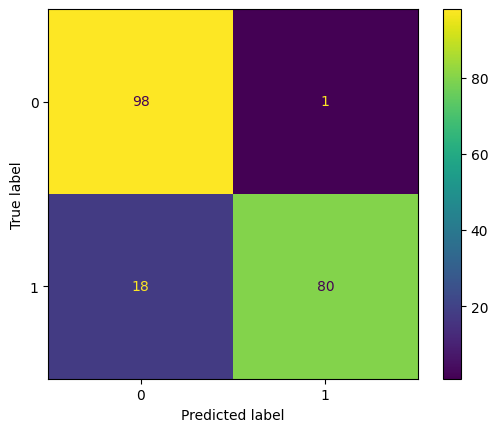

In [ ]:
y_test_pred = best_dt.predict(X_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.84      0.99      0.91        99
       Fraud       0.99      0.82      0.89        98

    accuracy                           0.90       197
   macro avg       0.92      0.90      0.90       197
weighted avg       0.92      0.90      0.90       197



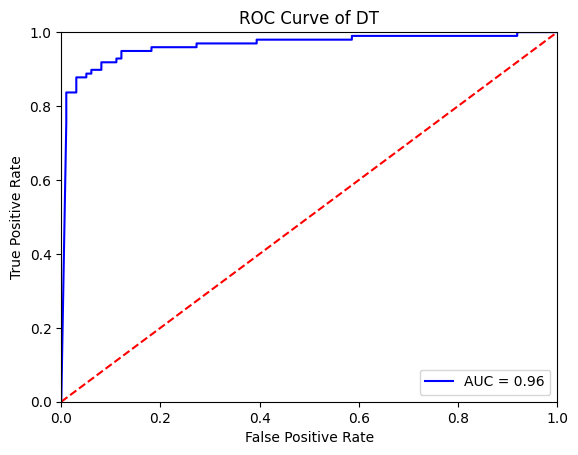

In [ ]:
show_roc_curve(best_nb, 'DT', X_test, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "DT", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
LR        4.66e-02   2.16e-03      0.94    0.90       0.99      0.94
kNN       2.73e-03   2.39e-02      0.93    0.86       1.00      0.92
NB        3.36e-03   1.06e-03      0.91    0.84       0.99      0.91
DT        3.64e-02   1.08e-02      0.90    0.82       0.99      0.89


## RandomForest

Karar ağaçlarının en büyük problemlerinden biri aşırı öğrenme-veriyi ezberlemedir (overfitting). Rassal orman modeli bu problemi çözmek için hem veri setinden hem de öznitelik setinden rassal olarak onlarca yüzlerce farklı alt-setler seçiyor ve bunları eğitiyor. Bu yöntemle yüzlerce karar ağacı oluşturuluyor ve her bir karar ağacı bireysel olarak tahminde bulunuyor. En çok oy alanı sonuç olarak veriyor.

In [ ]:
rf = RandomForestClassifier()
param_grid = {
  'max_depth': [2, 3, 5, 10, 20],
  'min_samples_leaf': [5, 10, 20, 50, 100],
  'n_estimators': [100, 150, 200]
}
rf_gscv = GridSearchCV(rf, param_grid, cv=5, return_train_score=True)
rf_gscv.fit(X_train, y_train)
pd.DataFrame(rf_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,68,47,33,50,65
mean_fit_time,0.56,1.24,0.39,1.12,0.51
std_fit_time,0.1,0.84,0.0,0.38,0.01
mean_score_time,0.02,0.05,0.02,0.04,0.02
std_score_time,0.0,0.01,0.0,0.0,0.0
param_max_depth,20,10,5,10,20
param_min_samples_leaf,20,5,10,10,10
param_n_estimators,200,200,100,200,200
params,"{'max_depth': 20, 'min_samples_leaf': 20, 'n_e...","{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...","{'max_depth': 5, 'min_samples_leaf': 10, 'n_es...","{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...","{'max_depth': 20, 'min_samples_leaf': 10, 'n_e..."
split0_test_score,0.95,0.95,0.95,0.94,0.94
split1_test_score,0.93,0.92,0.92,0.92,0.92


In [ ]:
print(f"En iyi parametreler {rf_gscv.best_params_}, en iyi skor {rf_gscv.best_score_}")

En iyi parametreler {'max_depth': 20, 'min_samples_leaf': 20, 'n_estimators': 200}, en iyi skor 0.9364589212287349


In [ ]:
start = time.time()
best_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=20, n_estimators=200)
best_rf.fit(X_train, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 2.545579195022583s


In [ ]:
start = time.time()
y_test_pred = best_rf.predict(X_test)
stop = time.time()
test_time = stop - start
print(f"Eğitim süresi: {test_time}s")

Eğitim süresi: 0.06818366050720215s


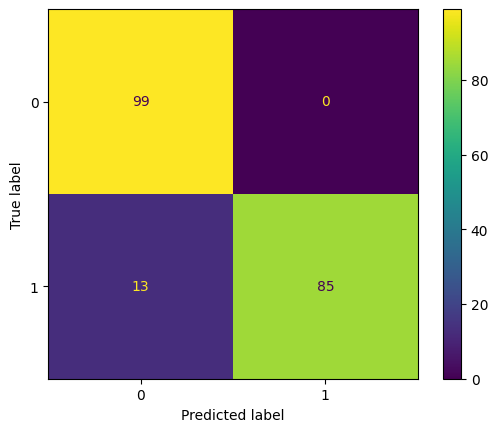

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.88      1.00      0.94        99
       Fraud       1.00      0.87      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



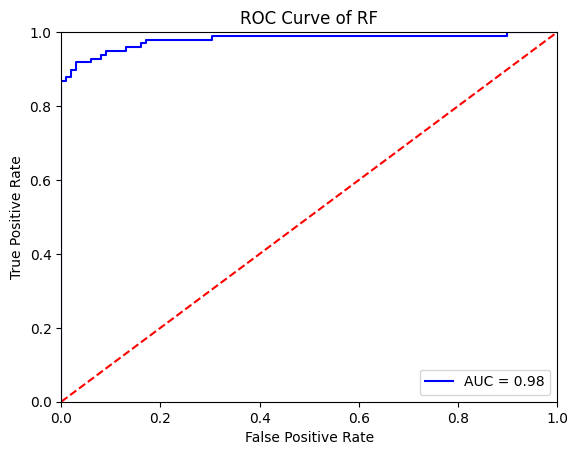

In [ ]:
show_roc_curve(best_rf, 'RF', X_test, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "RF", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
LR        4.66e-02   2.16e-03      0.94    0.90       0.99      0.94
RF        2.55e+00   6.82e-02      0.93    0.87       1.00      0.93
kNN       2.73e-03   2.39e-02      0.93    0.86       1.00      0.92
NB        3.36e-03   1.06e-03      0.91    0.84       0.99      0.91
DT        3.64e-02   1.08e-02      0.90    0.82       0.99      0.89


## Gradient Boosting

Boosting, zayıf öğrenicileri(weak learner) güçlü öğreniciye(strong learner) dönüştürme yöntemidir. Bunu iterasyonlar ile aşamalı olarak yapar. Boosting algoritmaları arasındaki fark genellikle zayıf öğrenicilerin eksikliğini nasıl tanımladıklarıdır. 

Gradient Boosting’de öncelikli olarak ilk yaprak(initial leaf) oluşturulur. Sonrasında tahmin hataları göz önüne alınarak yeni ağaçlar oluşturulur. Bu durum karar verilen ağaç sayısına ya da modelden daha fazla gelişme kaydedilemeyinceye kadar devam eder.

In [ ]:
gb = GradientBoostingClassifier()
param_grid = {
  'max_depth': np.arange(5,9, 1),
  'min_samples_leaf': [1, 2, 4],
  'n_estimators': [100, 150, 200]
}
gb_gscv = GridSearchCV(gb, param_grid, cv=5, return_train_score=True)
gb_gscv.fit(X_train, y_train)
pd.DataFrame(gb_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,33,35,17,34,22
mean_fit_time,1.65,3.53,2.71,2.42,2.36
std_fit_time,0.25,0.57,0.34,0.27,0.31
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_max_depth,8,8,6,8,7
param_min_samples_leaf,4,4,4,4,2
param_n_estimators,100,200,200,150,150
params,"{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 6, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 8, 'min_samples_leaf': 4, 'n_est...","{'max_depth': 7, 'min_samples_leaf': 2, 'n_est..."
split0_test_score,0.94,0.93,0.94,0.93,0.94
split1_test_score,0.93,0.93,0.94,0.93,0.93


In [ ]:
print(f"En iyi parametreler {gb_gscv.best_params_}, en iyi skor {gb_gscv.best_score_}")

En iyi parametreler {'max_depth': 8, 'min_samples_leaf': 4, 'n_estimators': 100}, en iyi skor 0.9402967024107071


In [ ]:
start = time.time()
best_gb = GradientBoostingClassifier(max_depth=7, min_samples_leaf=1, n_estimators=100)
best_gb.fit(X_train, y_train)
stop = time.time()
training_time = stop - start
print(f"Eğitim süresi: {training_time}s")

Eğitim süresi: 1.6720621585845947s


In [ ]:
start = time.time()
y_test_pred = best_gb.predict(X_test)
stop = time.time()
test_time = stop - start
print(f"Test süresi: {test_time}s")

Test süresi: 0.0022995471954345703s


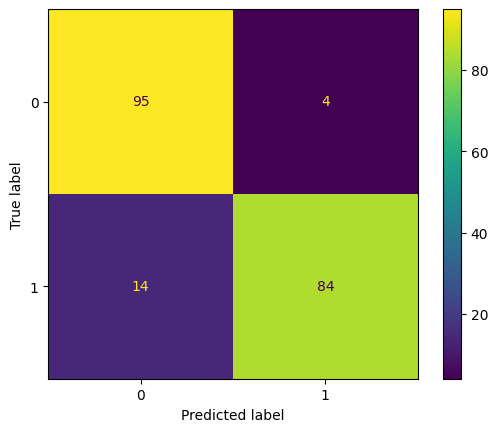

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.87      0.96      0.91        99
       Fraud       0.95      0.86      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



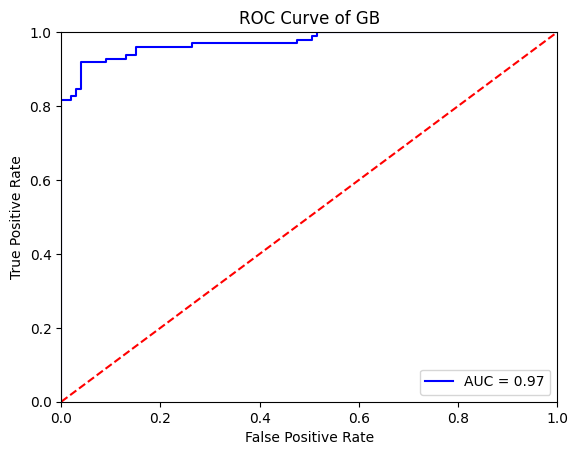

In [ ]:
show_roc_curve(best_gb, 'GB', X_test, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "GB", training_time, test_time)

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
LR        4.66e-02   2.16e-03      0.94    0.90       0.99      0.94
RF        2.55e+00   6.82e-02      0.93    0.87       1.00      0.93
kNN       2.73e-03   2.39e-02      0.93    0.86       1.00      0.92
NB        3.36e-03   1.06e-03      0.91    0.84       0.99      0.91
GB        1.67e+00   2.30e-03      0.91    0.86       0.95      0.90
DT        3.64e-02   1.08e-02      0.90    0.82       0.99      0.89


## Sonuçların Karşılaştırılması

In [ ]:
print(model_performance.sort_values("F1-Score", ascending=False))

     Training Time  Test Time  Accuracy  Recall  Precision  F1-Score
LR        4.66e-02   2.16e-03      0.94    0.90       0.99      0.94
RF        2.55e+00   6.82e-02      0.93    0.87       1.00      0.93
kNN       2.73e-03   2.39e-02      0.93    0.86       1.00      0.92
NB        3.36e-03   1.06e-03      0.91    0.84       0.99      0.91
GB        1.67e+00   2.30e-03      0.91    0.86       0.95      0.90
DT        3.64e-02   1.08e-02      0.90    0.82       0.99      0.89


Kullanılan tüm algoritmaların en iyi optimize hallerinin karşılaştırılmasında aralarında çok küçük fark olmasına rağmen Logistic Regression Alogritması diğerlerinden daha iyi sonuç vermiştir.